In [ ]:
Missing Libraries

In [ ]:
pip install XlsxWriter

In [ ]:
pip install xlrd

In [13]:
import pandas as pd
import numpy as np

In [22]:
rainfall = pd.read_excel('AFG Data.xlsx', sheet_name = 'rainfall')
ndvi = pd.read_excel('AFG Data.xlsx', sheet_name = 'ndvi')
adm2 = pd.read_excel('AFG Data.xlsx', sheet_name = 'ADM2')
foodprice = pd.read_excel('AFG Data.xlsx', sheet_name = 'FoodP')
exchangeR = pd.read_excel('AFG Data.xlsx', sheet_name = 'exchangeR')
fuelP = pd.read_excel('AFG Data.xlsx', sheet_name = 'FuelP')
GFPrice = pd.read_excel('AFG Data.xlsx', sheet_name = 'GFoodP')
afg_other = pd.read_excel('AFG Data.xlsx', sheet_name = 'AFG Others')
foodC = pd.read_excel('AFG Data.xlsx', sheet_name = 'foodcrises')

In [23]:
adm2_c = adm2.copy()
rainfall_c = rainfall.copy()
ndvi_c = ndvi.copy()
foodprice_c = foodprice.copy()
exchangeR_c = exchangeR.copy()
fuelP_c = fuelP.copy()
GFPrice_c = GFPrice.copy()
afg_other_c = afg_other.copy()
foodC_copy = foodC.copy()


In [ ]:
# Admin

In [24]:
# Specify the columns to keep
columns_to_keep = ['ADM2_EN', 'ADM2_PCODE', 'ADM1_EN', 'ADM1_PCODE', 'AREA_SQKM']

# Create a new DataFrame containing only the specified columns
adm2_c2 = adm2_c[columns_to_keep].copy()

# Display the new DataFrame with the selected columns
print(adm2_c2)


             ADM2_EN ADM2_PCODE     ADM1_EN ADM1_PCODE    AREA_SQKM
0              Khash     AF1705  Badakhshan       AF17   242.907844
1    Hazrat-e-Sultan     AF2002    Samangan       AF20  2102.525804
2         Pul-e-Alam     AF0501       Logar       AF05  1130.973208
3          Mata Khan     AF1202     Paktika       AF12   405.445878
4           Gosfandi     AF2206   Sar-e-Pul       AF22   620.344073
..               ...        ...         ...        ...          ...
396        Musa Khel     AF1405       Khost       AF14   470.240608
397      Dawlat Abad     AF2909      Faryab       AF29  2657.363420
398        Qara Bagh     AF0114       Kabul       AF01   214.138621
399        Ab Kamari     AF3102     Badghis       AF31  2311.046447
400         Adraskan     AF3209       Hirat       AF32  8113.086079

[401 rows x 5 columns]


In [25]:
# Get unique names in adm1_name and their count
unique_adm1_names = adm2_c2['ADM2_EN'].dropna().unique()
adm1_count = len(unique_adm1_names)
unique_adm1_names_str = ', '.join(unique_adm1_names)
print(f'Unique adm1_name values ({adm1_count}): {unique_adm1_names_str}')


Unique adm1_name values (390): Khash, Hazrat-e-Sultan, Pul-e-Alam, Mata Khan, Gosfandi, Chamkani, Shuhada, Waygal, Kaldar, Paryan, Mingajik, Ghorak, Shahrestan, Sharak-e-Hayratan, Chinarto, Panjwayi, Shahrak, Lash-e-Juwayn, Ghorband, Pashtun Kot, Marmul, Imam Sahib, Spera, Obe, Chawkay, Surobi, Deh-e-Shu, Jaghatu, Teshkan, Ashtarlay, Charsadra, Aybak, Nurgaram, Chapa Dara, Qalandar, Giro, Jalrez, Waghaz, Khas Uruzgan, Kohistan, Mir Bacha Kot, Kiti, Mahmood-e-Raqi, Gizab, Shamal, Jaji, Behsud, Lija Ahmad Khel, Shamul Zayi, Muhmand Dara, Ab Band, Darzab, Gulran, Baharak, Zheray, Daychopan, Watapur, Jaghuri, Kang, Jani Khel, Duab, Guzara, Farza, Shakar Dara, Jaji Maydan, Hesarak, Koran Wa Monjan, Patoo, Alingar, Asad Abad, Maydan Shahr, Shahr-e-Buzorg, Mizan, Pushtrod, Tani, Khwaja Hejran, Miyanshin, Ziruk, Warsaj, Dawlat Abad, Hazar Sumuch, Guzargah-e-Nur, Mazar-e-Sharif, Taloqan, Wama, Jorm, Koh Band, Deh Sabz, Qala-e-Kah, Chora, Mehtarlam, Qurghan, Bangi, Koh-e-Safi, Yamgan, Kamdesh, B

In [ ]:
Food Crises

In [30]:
# Convert 'year' and 'month' columns to a date format and create a 'date' column
foodC_copy['date'] = pd.to_datetime(foodC_copy['year'].astype(str) + '-' + foodC_copy['month'].astype(str) + '-01')

print(foodC_copy)

       adm1_name  year  month  cropland_pct         area            pop  \
0     Badakhshan  2007      1      3.039833  43407.92000  862851.350000   
1     Badakhshan  2007      2      3.039833  43407.92000  862851.350000   
2     Badakhshan  2007      3      3.039833  43407.92000  862851.350000   
3     Badakhshan  2007      4      3.039833  43407.92000  862851.350000   
4     Badakhshan  2007      5      3.039833  43407.92000  862851.350000   
...          ...   ...    ...           ...          ...            ...   
6931       Zabul  2023      8      0.205631  17361.01751  396600.561889   
6932       Zabul  2023      9      0.205631  17361.01751  396600.561889   
6933       Zabul  2023     10      0.205631  17361.01751  396600.561889   
6934       Zabul  2023     11      0.205631  17361.01751  396600.561889   
6935       Zabul  2023     12      0.205631  17361.01751  396600.561889   

      ruggedness_mean  pasture_pct       date  
0         654980.7000     31.03333 2007-01-01  
1  

In [32]:
# Get unique distinct names from 'ADM2_EN' column
distinct_names = foodC['adm1_name'].dropna().unique()

# Convert the array of distinct names to a comma-separated string
names_string = ', '.join(distinct_names)

# Print the distinct names separated by commas
print(f"Distinct names in 'ADM2_EN' column: {names_string}")

# Get the count of distinct names
distinct_names_count = len(distinct_names)

# Print the count of distinct names
print(f"Count of distinct names in 'ADM2_EN' column: {distinct_names_count}")


Distinct names in 'ADM2_EN' column: Badakhshan, Badghis, Baghlan, Balkh, Bamyan, Daykundi, Farah, Faryab, Ghazni, Ghor, Hilmand, Hirat, Jawzjan, Kabul, Kandahar, Kapisa, Khost, Kunar, Kunduz, Laghman, Logar, Nangarhar, Nimroz, Nuristan, Paktika, Paktya, Panjsher, Parwan, Samangan, Sar-e-Pul, Takhar, Uruzgan, Wardak, Zabul
Count of distinct names in 'ADM2_EN' column: 34


In [ ]:
# Rainfall and NDVI

In [34]:
# Print the first few rows to verify
print(rainfall_c.head())


        date  adm2_id ADM2_PCODE  n_pixels      rfh  rfh_avg       r1h  \
0 1981-01-01  1007178     AF1508         7  18.2857  22.7619       NaN   
1 1981-01-11  1007178     AF1508         7  11.8571  19.4238       NaN   
2 1981-01-21  1007178     AF1508         7  33.2857  26.6524   63.4286   
3 1981-02-01  1007178     AF1508         7  24.7143  40.5571   69.8571   
4 1981-02-11  1007178     AF1508         7  42.5714  32.6524  100.5714   

   r1h_avg  r3h  r3h_avg       rfq       r1q  r3q version  
0      NaN  NaN      NaN   83.8765       NaN  NaN   final  
1      NaN  NaN      NaN   69.0193       NaN  NaN   final  
2  68.8381  NaN      NaN  120.9568   93.1384  NaN   final  
3  86.6333  NaN      NaN   65.2242   82.6393  NaN   final  
4  99.8619  NaN      NaN  126.3437  100.6458  NaN   final  


In [36]:
# Convert 'date' column to datetime format
rainfall_c['date'] = pd.to_datetime(rainfall_c['date'])

# Extract year and month from the 'date' column
rainfall_c['year'] = rainfall_c['date'].dt.year
rainfall_c['month'] = rainfall_c['date'].dt.month

# Group by year, month, and other columns, and aggregate 'rfh' to monthly intervals
monthly_rainfall_data = rainfall_c.groupby(['ADM2_PCODE', 'year', 'month']).agg({
    'rfh': ['mean', 'sum'] 
}).reset_index()

# Reset column names to more descriptive names
monthly_rainfall_data.columns = [
    'ADM2_PCODE', 'year', 'month', 'rfhmean', 'rfhsum'
]

# Resetting the index to make the DataFrame more readable
monthly_rainfall_data.reset_index(drop=True, inplace=True)

# Convert 'year' and 'month' columns to datetime format
monthly_rainfall_data['date'] = pd.to_datetime(monthly_rainfall_data[['year', 'month']].assign(day=1))

# Filter out rows where 'year' is less than 2007
monthly_rainfall_data = monthly_rainfall_data[monthly_rainfall_data['year'] >= 2009]

print(monthly_rainfall_data)


       ADM2_PCODE  year  month    rfhmean   rfhsum       date
336        AF0101  2009      1  20.861100  62.5833 2009-01-01
337        AF0101  2009      2  25.277767  75.8333 2009-02-01
338        AF0101  2009      3  26.694467  80.0834 2009-03-01
339        AF0101  2009      4  27.777767  83.3333 2009-04-01
340        AF0101  2009      5   9.194433  27.5833 2009-05-01
...           ...   ...    ...        ...      ...        ...
206845     AF3405  2024      5   2.031433   6.0943 2024-05-01
206846     AF3405  2024      6   0.000000   0.0000 2024-06-01
206847     AF3405  2024      7   0.000000   0.0000 2024-07-01
206848     AF3405  2024      8   0.000000   0.0000 2024-08-01
206849     AF3405  2024      9   0.000000   0.0000 2024-09-01

[74466 rows x 6 columns]


In [38]:
# Drop the second row of the rainfall_c dataframe
ndvi_c = ndvi_c.drop(index=ndvi_c.index[0])

# Print the first few rows to verify
print(ndvi_c.head())


                  date  adm2_id ADM2_PCODE n_pixels     vim vim_avg      viq
1  2002-07-01 00:00:00  1007178     AF1508        7   0.412   0.433  95.6421
2  2002-07-11 00:00:00  1007178     AF1508        7  0.4159  0.4399  95.1153
3  2002-07-21 00:00:00  1007178     AF1508        7  0.4194   0.447  94.4557
4  2002-08-01 00:00:00  1007178     AF1508        7  0.4234  0.4532  94.0777
5  2002-08-11 00:00:00  1007178     AF1508        7  0.4264  0.4567  94.0072


In [40]:
# Convert 'date' column to datetime format
ndvi_c['date'] = pd.to_datetime(ndvi_c['date'])

# Extract year and month from the 'date' column
ndvi_c['year'] = ndvi_c['date'].dt.year
ndvi_c['month'] = ndvi_c['date'].dt.month

# Group by year, month, and other columns, and aggregate NDVI values to monthly intervals
monthly_ndvi_data = ndvi_c.groupby(['ADM2_PCODE', 'year', 'month']).agg({
    'vim': ['mean'] 
}).reset_index()

# Reset column names to more descriptive names
monthly_ndvi_data.columns = ['ADM2_PCODE', 'year', 'month', 'vimmean']

# Resetting the index to make the DataFrame more readable
monthly_ndvi_data.reset_index(drop=True, inplace=True)

# Convert 'year' and 'month' columns to datetime format and create a new 'date' column
monthly_ndvi_data['date'] = pd.to_datetime(monthly_ndvi_data[['year', 'month']].assign(day=1))

# Filter out rows where 'year' is less than 2007
monthly_ndvi_data = monthly_ndvi_data[monthly_ndvi_data['year'] >= 2009]

# Display the updated DataFrame with aggregated monthly NDVI data
print(monthly_ndvi_data)


       ADM2_PCODE  year  month   vimmean       date
78         AF0101  2009      1  0.081867 2009-01-01
79         AF0101  2009      2  0.084633 2009-02-01
80         AF0101  2009      3    0.1194 2009-03-01
81         AF0101  2009      4  0.171667 2009-04-01
82         AF0101  2009      5    0.1968 2009-05-01
...           ...   ...    ...       ...        ...
105193     AF3405  2024      5  0.084467 2024-05-01
105194     AF3405  2024      6    0.0835 2024-06-01
105195     AF3405  2024      7  0.082633 2024-07-01
105196     AF3405  2024      8  0.082433 2024-08-01
105197     AF3405  2024      9    0.0834 2024-09-01

[74466 rows x 5 columns]


In [41]:
# Merge with VoiceA_m on matching values in 'Country' and 'Year'
rainfall_ndvi = pd.merge(monthly_rainfall_data, monthly_ndvi_data, on=['ADM2_PCODE', 'date'], how='inner')

print(rainfall_ndvi)

      ADM2_PCODE  year_x  month_x    rfhmean   rfhsum       date  year_y  \
0         AF0101    2009        1  20.861100  62.5833 2009-01-01    2009   
1         AF0101    2009        2  25.277767  75.8333 2009-02-01    2009   
2         AF0101    2009        3  26.694467  80.0834 2009-03-01    2009   
3         AF0101    2009        4  27.777767  83.3333 2009-04-01    2009   
4         AF0101    2009        5   9.194433  27.5833 2009-05-01    2009   
...          ...     ...      ...        ...      ...        ...     ...   
74461     AF3405    2024        5   2.031433   6.0943 2024-05-01    2024   
74462     AF3405    2024        6   0.000000   0.0000 2024-06-01    2024   
74463     AF3405    2024        7   0.000000   0.0000 2024-07-01    2024   
74464     AF3405    2024        8   0.000000   0.0000 2024-08-01    2024   
74465     AF3405    2024        9   0.000000   0.0000 2024-09-01    2024   

       month_y   vimmean  
0            1  0.081867  
1            2  0.084633  
2     

In [42]:
# Get the column names
column_names = rainfall_ndvi.columns

# Display the column names separated by commas
column_names_str = ', '.join(column_names)
print(f"Column Names: {column_names_str}")

Column Names: ADM2_PCODE, year_x, month_x, rfhmean, rfhsum, date, year_y, month_y, vimmean


In [ ]:
# Drop specified columns
columns_to_drop = ['year_y', 'month_y']
rainfall_ndvi = rainfall_ndvi.drop(columns=columns_to_drop)

# Rename columns by removing '_x' suffix
rename_mapping = {
    'year_x': 'year',
    'month_x': 'month'
}
rainfall_ndvi.rename(columns=rename_mapping, inplace=True)

# Display the cleaned DataFrame
print(rainfall_ndvi)


In [ ]:
# adding admin

In [51]:
print(adm2_c2.head())

           ADM2_EN ADM2_PCODE     ADM1_EN ADM1_PCODE    AREA_SQKM
0            Khash     AF1705  Badakhshan       AF17   242.907844
1  Hazrat-e-Sultan     AF2002    Samangan       AF20  2102.525804
2       Pul-e-Alam     AF0501       Logar       AF05  1130.973208
3        Mata Khan     AF1202     Paktika       AF12   405.445878
4         Gosfandi     AF2206   Sar-e-Pul       AF22   620.344073


In [53]:
# Merge with admin data
rainfall_ndvi_f = pd.merge(adm2_c2, rainfall_ndvi, on=['ADM2_PCODE'], how='inner')

print(rainfall_ndvi_f)

        ADM2_EN ADM2_PCODE     ADM1_EN ADM1_PCODE    AREA_SQKM  year  month  \
0         Khash     AF1705  Badakhshan       AF17   242.907844  2009      1   
1         Khash     AF1705  Badakhshan       AF17   242.907844  2009      2   
2         Khash     AF1705  Badakhshan       AF17   242.907844  2009      3   
3         Khash     AF1705  Badakhshan       AF17   242.907844  2009      4   
4         Khash     AF1705  Badakhshan       AF17   242.907844  2009      5   
...         ...        ...         ...        ...          ...   ...    ...   
74461  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      5   
74462  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      6   
74463  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      7   
74464  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      8   
74465  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      9   

         rfhmean    rfhsum       date   vimmean  
0

In [55]:
distinct_names_count3 = rainfall_ndvi_f['ADM2_EN'].nunique()

print("Count of distinct names in 'adm1_name' column:", distinct_names_count3)


Count of distinct names in 'adm1_name' column: 384


In [57]:
# Assuming 'cities_c' is your DataFrame
distinct_names = rainfall_ndvi_f['ADM1_EN'].unique()

# Convert the array of distinct names to a comma-separated string
names_string = ", ".join(distinct_names)

# Print the distinct names separated by commas
print("Distinct names in 'adm1_name' column:", names_string)


Distinct names in 'adm1_name' column: Badakhshan, Samangan, Logar, Paktika, Sar-e-Pul, Paktya, Nuristan, Balkh, Panjsher, Jawzjan, Kandahar, Daykundi, Ghor, Farah, Parwan, Faryab, Kunduz, Khost, Hirat, Kunar, Kabul, Hilmand, Ghazni, Wardak, Uruzgan, Kapisa, Nangarhar, Zabul, Takhar, Nimroz, Laghman, Baghlan, Badghis, Bamyan


In [59]:
# Get the column names
column_names = rainfall_ndvi_f.columns

# Display the column names separated by commas
column_names_str = ', '.join(column_names)
print(f"Column Names: {column_names_str}")

Column Names: ADM2_EN, ADM2_PCODE, ADM1_EN, ADM1_PCODE, AREA_SQKM, year, month, rfhmean, rfhsum, date, vimmean


In [ ]:
# Food prices, wages and exchange rate

In [61]:
# Define the categories and corresponding columns
categories = {
    'bread': ['o_bread', 'h_bread', 'l_bread', 'c_bread'],
    'rice': ['o_rice', 'h_rice', 'l_rice', 'c_rice'],
    'wheat': ['o_wheat', 'h_wheat', 'l_wheat', 'c_wheat']
}

# Calculate average for each category and create new columns
for category, columns in categories.items():
    foodprice_c[f'avg_{category}'] = foodprice_c[columns].mean(axis=1)

# Define the average columns based on the new categories
average_columns = ['avg_bread', 'avg_rice', 'avg_wheat']

# Calculate the overall average and assign to a new column 'avg_food'
foodprice_c['avg_food'] = foodprice_c[average_columns].mean(axis=1)

# Print the 'avg_food' column
print(foodprice_c['avg_food'])

# List of columns to keep in the new DataFrame
columns_to_keep = ['adm1_name', 'adm2_name', 'mkt_name', 'lat', 'lon', 'price_date', 'year', 'month', 
                   'avg_bread', 'avg_rice', 'avg_wheat', 'avg_food']

# Create a new DataFrame containing only the specified columns
foodprice_c2 = foodprice_c[columns_to_keep].copy()

# Display the new DataFrame
print(foodprice_c2.head())


0       23.690000
1       24.564167
2       25.754167
3       26.222500
4       27.848333
          ...    
8728    51.094167
8729    49.850000
8730    49.306667
8731    49.018333
8732    48.920833
Name: avg_food, Length: 8733, dtype: float64
    adm1_name adm2_name    mkt_name       lat       lon price_date  year  \
0  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-01-01  2007   
1  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-02-01  2007   
2  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-03-01  2007   
3  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-04-01  2007   
4  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-05-01  2007   

   month  avg_bread  avg_rice  avg_wheat   avg_food  
0      1    31.1625   24.6800    15.2275  23.690000  
1      2    31.8925   26.3175    15.4825  24.564167  
2      3    32.7525   28.8150    15.6950  25.754167  
3      4    32.5700   29.1675    16.9300  26.222500  
4      5    32.8200   31.3475 

In [63]:
# Filter rows based on the 'mkt_name' column
foodprice_c2 = foodprice_c2[~foodprice_c2['mkt_name'].str.contains('Market Average')]

# Display the filtered DataFrame
print(foodprice_c2)


       adm1_name adm2_name    mkt_name       lat       lon price_date  year  \
0     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-01-01  2007   
1     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-02-01  2007   
2     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-03-01  2007   
3     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-04-01  2007   
4     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-05-01  2007   
...          ...       ...         ...       ...       ...        ...   ...   
8515       Zabul     Qalat       Zabul  32.19989  67.14782 2024-05-01  2024   
8516       Zabul     Qalat       Zabul  32.19989  67.14782 2024-06-01  2024   
8517       Zabul     Qalat       Zabul  32.19989  67.14782 2024-07-01  2024   
8518       Zabul     Qalat       Zabul  32.19989  67.14782 2024-08-01  2024   
8519       Zabul     Qalat       Zabul  32.19989  67.14782 2024-09-01  2024   

      month  avg_bread  avg_rice  avg_wheat   avg_f

In [65]:
distinct_names_count = foodprice_c2['mkt_name'].nunique()

print("Count of distinct names in 'adm1_name' column:", distinct_names_count)


Count of distinct names in 'adm1_name' column: 40


In [67]:
# Assuming 'cities_c' is your DataFrame
distinct_names = foodprice_c2['mkt_name'].unique()

# Convert the array of distinct names to a comma-separated string
names_string = ", ".join(distinct_names)

# Print the distinct names separated by commas
print("Distinct names in 'adm1_name' column:", names_string)


Distinct names in 'adm1_name' column: Badakhshan, Badghis, Baghlan, Balkh, Bamyan, Daykundi, Farah, Faryab, Fayzabad, Gardez, Ghazni, Ghor, Hilmand, Hirat, Jalalabad, Jawzjan, Kabul, Kandahar, Kapisa, Khost, Kunar, Kunduz, Laghman, Logar, Maidan Wardak, Maymana, Mazar, Nangarhar, Nili, Nimroz, Nuristan, Paktika, Paktya, Panjsher, Parwan, Samangan, Sar-e-Pul, Takhar, Uruzgan, Zabul


In [ ]:
# Exchange rate

In [69]:
# List of exchange rate columns to calculate the average
exchange_rate_columns = ['o_exchange_rate_unofficial', 'h_exchange_rate_unofficial',
                         'l_exchange_rate_unofficial', 'c_exchange_rate_unofficial']

# Calculate the average for exchange rate and assign to a new column 'avgexchangeR'
exchangeR_c['avgexchangeR'] = exchangeR_c[exchange_rate_columns].mean(axis=1)

# List of non-qualified labour wage columns to calculate the average
wage_non_qualified_columns = ['o_wage_non_qualified_labour_non_agricultural', 
                              'h_wage_non_qualified_labour_non_agricultural',
                              'l_wage_non_qualified_labour_non_agricultural', 
                              'c_wage_non_qualified_labour_non_agricultural']

# Calculate the average for non-qualified labour wage and assign to a new column 'avgWageNonQL'
exchangeR_c['avgWageNonQL'] = exchangeR_c[wage_non_qualified_columns].mean(axis=1)

# List of qualified labour wage columns to calculate the average
wage_qualified_columns = ['o_wage_qualified_labour', 'h_wage_qualified_labour',
                          'l_wage_qualified_labour', 'c_wage_qualified_labour']

# Calculate the average for qualified labour wage and assign to a new column 'avgWageQL'
exchangeR_c['avgWageQL'] = exchangeR_c[wage_qualified_columns].mean(axis=1)

# Create a new column 'aveWageQLNL' consisting of the average of 'avgWageNonQL' and 'avgWageQL'
exchangeR_c['aveWageQLNL'] = exchangeR_c[['avgWageNonQL', 'avgWageQL']].mean(axis=1)

# Filter rows based on the 'mkt_name' column to exclude rows containing 'Market Average'
exchangeR_c = exchangeR_c[~exchangeR_c['mkt_name'].str.contains('Market Average')]

# Print the first few rows of the dataframe to check the results
print(exchangeR_c.head())


  ISO3      country   adm1_name adm2_name    mkt_name       lat       lon  \
0  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   
1  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   
2  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   
3  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   
4  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   

                   geo_id price_date  year  ...  o_wage_qualified_labour  \
0  gid_370378500704562100 2007-01-01  2007  ...                   726.99   
1  gid_370378500704562100 2007-02-01  2007  ...                   726.67   
2  gid_370378500704562100 2007-03-01  2007  ...                   726.62   
3  gid_370378500704562100 2007-04-01  2007  ...                   732.91   
4  gid_370378500704562100 2007-05-01  2007  ...                   740.38   

  h_wage_qualified_labour  l_wage_qualified_labour  c_wage_qualified_labour  \
0

In [71]:
# List of columns to keep in the new DataFrame
columns_to_keep = ['mkt_name', 'price_date', 'avgexchangeR', 'avgWageNonQL', 'avgWageQL', 'aveWageQLNL']

# Create a new DataFrame containing only the specified columns
exchangeR_c2 = exchangeR_c[columns_to_keep].copy()

# Display the new DataFrame
print(exchangeR_c2.head())


     mkt_name price_date  avgexchangeR  avgWageNonQL  avgWageQL  aveWageQLNL
0  Badakhshan 2007-01-01       50.8800      247.2800   726.8425    487.06125
1  Badakhshan 2007-02-01       50.7725      250.0650   726.6700    488.36750
2  Badakhshan 2007-03-01       50.4375      255.1775   727.8525    491.51500
3  Badakhshan 2007-04-01       50.6925      255.9675   734.2850    495.12625
4  Badakhshan 2007-05-01       50.5400      264.9000   728.2650    496.58250


In [73]:
distinct_names_count1 = exchangeR_c2['mkt_name'].nunique()

print("Count of distinct names in 'adm1_name' column:", distinct_names_count1)


Count of distinct names in 'adm1_name' column: 40


In [ ]:
# Cleaning Fuel Data

In [75]:
# List of diesel fuel columns to calculate the average
diesel_fuel_columns = ['o_fuel_diesel', 'h_fuel_diesel', 'l_fuel_diesel', 'c_fuel_diesel']

# Calculate the average for diesel fuel and assign to a new column 'dieselP'
fuelP_c['avgfuelP'] = fuelP_c[diesel_fuel_columns].mean(axis=1)

# Filter rows based on the 'mkt_name' column
fuelP_c = fuelP_c[~fuelP_c['mkt_name'].str.contains('Market Average')]

# Print the first few rows of the dataframe to check the results
print(fuelP_c.head())


  ISO3      country   adm1_name adm2_name    mkt_name       lat       lon  \
0  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   
1  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   
2  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   
3  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   
4  AFG  Afghanistan  Badakhshan      Argo  Badakhshan  37.03785  70.45621   

                   geo_id price_date  year  ...  currency  \
0  gid_370378500704562100 2007-01-01  2007  ...       AFN   
1  gid_370378500704562100 2007-02-01  2007  ...       AFN   
2  gid_370378500704562100 2007-03-01  2007  ...       AFN   
3  gid_370378500704562100 2007-04-01  2007  ...       AFN   
4  gid_370378500704562100 2007-05-01  2007  ...       AFN   

  spatially_interpolated  fuel_diesel  o_fuel_diesel  h_fuel_diesel  \
0                      0          NaN          36.31          37.54   
1                      0    

In [77]:
# List of columns to keep in the new DataFrame
columns_to_keep = ['mkt_name', 'price_date', 'avgfuelP']

# Create a new DataFrame containing only the specified columns
fuelP_c2 = fuelP_c[columns_to_keep].copy()

# Display the new DataFrame
print(fuelP_c2)


        mkt_name price_date  avgfuelP
0     Badakhshan 2007-01-01   36.5825
1     Badakhshan 2007-02-01   37.1550
2     Badakhshan 2007-03-01   38.0850
3     Badakhshan 2007-04-01   37.7275
4     Badakhshan 2007-05-01   40.5250
...          ...        ...       ...
8515       Zabul 2024-05-01   56.6475
8516       Zabul 2024-06-01   56.1375
8517       Zabul 2024-07-01   57.0275
8518       Zabul 2024-08-01   57.5275
8519       Zabul 2024-09-01   63.2000

[8520 rows x 3 columns]


In [79]:
distinct_names_count1 = fuelP_c['mkt_name'].nunique()

print("Count of distinct names in 'adm1_name' column:", distinct_names_count1)


Count of distinct names in 'adm1_name' column: 40


In [81]:
# Assuming 'cities_c' is your DataFrame
distinct_names = fuelP_c['mkt_name'].unique()

# Convert the array of distinct names to a comma-separated string
names_string = ", ".join(distinct_names)

# Print the distinct names separated by commas
print("Distinct names in 'adm1_name' column:", names_string)


Distinct names in 'adm1_name' column: Badakhshan, Badghis, Baghlan, Balkh, Bamyan, Daykundi, Farah, Faryab, Fayzabad, Gardez, Ghazni, Ghor, Hilmand, Hirat, Jalalabad, Jawzjan, Kabul, Kandahar, Kapisa, Khost, Kunar, Kunduz, Laghman, Logar, Maidan Wardak, Maymana, Mazar, Nangarhar, Nili, Nimroz, Nuristan, Paktika, Paktya, Panjsher, Parwan, Samangan, Sar-e-Pul, Takhar, Uruzgan, Zabul


In [ ]:
# Merging price, exchange rate and fuel price

In [83]:
# Merge the data
price_exchRate = pd.merge(foodprice_c2, exchangeR_c2, on=['mkt_name', 'price_date'], how='inner')

print(price_exchRate)

       adm1_name adm2_name    mkt_name       lat       lon price_date  year  \
0     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-01-01  2007   
1     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-02-01  2007   
2     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-03-01  2007   
3     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-04-01  2007   
4     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-05-01  2007   
...          ...       ...         ...       ...       ...        ...   ...   
8515       Zabul     Qalat       Zabul  32.19989  67.14782 2024-05-01  2024   
8516       Zabul     Qalat       Zabul  32.19989  67.14782 2024-06-01  2024   
8517       Zabul     Qalat       Zabul  32.19989  67.14782 2024-07-01  2024   
8518       Zabul     Qalat       Zabul  32.19989  67.14782 2024-08-01  2024   
8519       Zabul     Qalat       Zabul  32.19989  67.14782 2024-09-01  2024   

      month  avg_bread  avg_rice  avg_wheat   avg_f

In [85]:
# Merge with fuel
price_exchRate_fuel = pd.merge(price_exchRate, fuelP_c2, on=['mkt_name', 'price_date'], how='inner')

print(price_exchRate_fuel)

       adm1_name adm2_name    mkt_name       lat       lon price_date  year  \
0     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-01-01  2007   
1     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-02-01  2007   
2     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-03-01  2007   
3     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-04-01  2007   
4     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-05-01  2007   
...          ...       ...         ...       ...       ...        ...   ...   
8515       Zabul     Qalat       Zabul  32.19989  67.14782 2024-05-01  2024   
8516       Zabul     Qalat       Zabul  32.19989  67.14782 2024-06-01  2024   
8517       Zabul     Qalat       Zabul  32.19989  67.14782 2024-07-01  2024   
8518       Zabul     Qalat       Zabul  32.19989  67.14782 2024-08-01  2024   
8519       Zabul     Qalat       Zabul  32.19989  67.14782 2024-09-01  2024   

      month  avg_bread  avg_rice  avg_wheat   avg_f

In [87]:
distinct_names_count2 = price_exchRate_fuel['adm1_name'].nunique()

print("Count of distinct names in 'adm1_name' column:", distinct_names_count2)


Count of distinct names in 'adm1_name' column: 34


In [89]:
# Display the updated dataframe to verify the change
print(price_exchRate_fuel.head())


    adm1_name adm2_name    mkt_name       lat       lon price_date  year  \
0  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-01-01  2007   
1  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-02-01  2007   
2  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-03-01  2007   
3  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-04-01  2007   
4  Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-05-01  2007   

   month  avg_bread  avg_rice  avg_wheat   avg_food  avgexchangeR  \
0      1    31.1625   24.6800    15.2275  23.690000       50.8800   
1      2    31.8925   26.3175    15.4825  24.564167       50.7725   
2      3    32.7525   28.8150    15.6950  25.754167       50.4375   
3      4    32.5700   29.1675    16.9300  26.222500       50.6925   
4      5    32.8200   31.3475    19.3775  27.848333       50.5400   

   avgWageNonQL  avgWageQL  aveWageQLNL  avgfuelP  
0      247.2800   726.8425    487.06125   36.5825  
1      250.0650   726.67

In [91]:
print(foodC_copy)

       adm1_name  year  month  cropland_pct         area            pop  \
0     Badakhshan  2007      1      3.039833  43407.92000  862851.350000   
1     Badakhshan  2007      2      3.039833  43407.92000  862851.350000   
2     Badakhshan  2007      3      3.039833  43407.92000  862851.350000   
3     Badakhshan  2007      4      3.039833  43407.92000  862851.350000   
4     Badakhshan  2007      5      3.039833  43407.92000  862851.350000   
...          ...   ...    ...           ...          ...            ...   
6931       Zabul  2023      8      0.205631  17361.01751  396600.561889   
6932       Zabul  2023      9      0.205631  17361.01751  396600.561889   
6933       Zabul  2023     10      0.205631  17361.01751  396600.561889   
6934       Zabul  2023     11      0.205631  17361.01751  396600.561889   
6935       Zabul  2023     12      0.205631  17361.01751  396600.561889   

      ruggedness_mean  pasture_pct       date  
0         654980.7000     31.03333 2007-01-01  
1  

In [93]:
# Merging with food crises data
price_exchRate_fuel_crises = pd.merge(price_exchRate_fuel, foodC_copy, on=['adm1_name', 'year', 'month'], how='inner')

print(price_exchRate_fuel_crises)

       adm1_name adm2_name    mkt_name       lat       lon price_date  year  \
0     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-01-01  2007   
1     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-02-01  2007   
2     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-03-01  2007   
3     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-04-01  2007   
4     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2007-05-01  2007   
...          ...       ...         ...       ...       ...        ...   ...   
8155       Zabul     Qalat       Zabul  32.19989  67.14782 2023-08-01  2023   
8156       Zabul     Qalat       Zabul  32.19989  67.14782 2023-09-01  2023   
8157       Zabul     Qalat       Zabul  32.19989  67.14782 2023-10-01  2023   
8158       Zabul     Qalat       Zabul  32.19989  67.14782 2023-11-01  2023   
8159       Zabul     Qalat       Zabul  32.19989  67.14782 2023-12-01  2023   

      month  avg_bread  avg_rice  ...  avgWageNonQL

In [95]:
distinct_names_count1 = price_exchRate_fuel_crises['adm1_name'].nunique()

print("Count of distinct names in 'adm1_name' column:", distinct_names_count1)


Count of distinct names in 'adm1_name' column: 34


In [ ]:
# Merging with AFG other data that have seasonal dummies, fews_IPC and other data

In [97]:
print(afg_other_c.head())

  ISO3      country   adm1_name  year  month  fews_ipc  fews_ha  IPC  \
0  AFG  Afghanistan     Laghman  2009      7         1      NaN    1   
1  AFG  Afghanistan  Badakhshan  2009      7         1      NaN    1   
2  AFG  Afghanistan      Bamyan  2009      7         1      NaN    1   
3  AFG  Afghanistan        Ghor  2009      7         1      NaN    1   
4  AFG  Afghanistan      Nimroz  2009      7         1      NaN    1   

   fews_ipc_adjusted  winter  spring  summer  fall  
0                  1       0       0       1     0  
1                  1       0       0       1     0  
2                  1       0       0       1     0  
3                  1       0       0       1     0  
4                  1       0       0       1     0  


In [99]:
price_exchRate_fuel_crises2 = pd.merge(price_exchRate_fuel_crises, afg_other_c, on=['adm1_name', 'year', 'month'], how='inner')

print(price_exchRate_fuel_crises2)

       adm1_name adm2_name    mkt_name       lat       lon price_date  year  \
0     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-07-01  2009   
1     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-07-01  2009   
2     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-08-01  2009   
3     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-08-01  2009   
4     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-09-01  2009   
...          ...       ...         ...       ...       ...        ...   ...   
8991       Zabul     Qalat       Zabul  32.19989  67.14782 2023-07-01  2023   
8992       Zabul     Qalat       Zabul  32.19989  67.14782 2023-08-01  2023   
8993       Zabul     Qalat       Zabul  32.19989  67.14782 2023-09-01  2023   
8994       Zabul     Qalat       Zabul  32.19989  67.14782 2023-10-01  2023   
8995       Zabul     Qalat       Zabul  32.19989  67.14782 2023-11-01  2023   

      month  avg_bread  avg_rice  ...  ISO3      co

In [101]:
distinct_names_count1 = price_exchRate_fuel_crises2['adm1_name'].nunique()

print("Count of distinct names in 'adm1_name' column:", distinct_names_count1)


Count of distinct names in 'adm1_name' column: 34


In [ ]:
# Merging the above with global food price

In [103]:
# Create GFPrice_c2 dataframe with only 'date' and 'GFoodPrice' columns
GFPrice_c2 = GFPrice_c[['date', 'GFoodPrice']]

# Print the first few rows to check the result
print(GFPrice_c2.head())


        date  GFoodPrice
0 2009-07-01  506.474386
1 2009-08-01  518.852508
2 2009-09-01  498.170386
3 2009-10-01  499.994796
4 2009-11-01  514.903157


In [105]:
# Merge rainfall, ndvi, conflict and price, exchange data
price_exchRate_fuel_crises3 = pd.merge(price_exchRate_fuel_crises2, GFPrice_c2, on=['date'], how='inner')

print(price_exchRate_fuel_crises3)

       adm1_name adm2_name    mkt_name       lat       lon price_date  year  \
0     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-07-01  2009   
1     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-07-01  2009   
2     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-08-01  2009   
3     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-08-01  2009   
4     Badakhshan      Argo  Badakhshan  37.03785  70.45621 2009-09-01  2009   
...          ...       ...         ...       ...       ...        ...   ...   
8991       Zabul     Qalat       Zabul  32.19989  67.14782 2023-07-01  2023   
8992       Zabul     Qalat       Zabul  32.19989  67.14782 2023-08-01  2023   
8993       Zabul     Qalat       Zabul  32.19989  67.14782 2023-09-01  2023   
8994       Zabul     Qalat       Zabul  32.19989  67.14782 2023-10-01  2023   
8995       Zabul     Qalat       Zabul  32.19989  67.14782 2023-11-01  2023   

      month  avg_bread  avg_rice  ...      country 

In [107]:
distinct_names_count1 = price_exchRate_fuel_crises3['adm1_name'].nunique()

print("Count of distinct names in 'adm1_name' column:", distinct_names_count1)


Count of distinct names in 'adm1_name' column: 34


In [ ]:
# Merging rainfall and NDVI to the above

In [109]:
# Rename columns 'ADM2_EN' to 'adm2_name' and 'ADM1_EN' to 'adm1_name'
rainfall_ndvi_f.rename(columns={'ADM2_EN': 'adm2_name', 'ADM1_EN': 'adm1_name'}, inplace=True)

# Display the updated dataframe to verify the change
print(rainfall_ndvi_f)


      adm2_name ADM2_PCODE   adm1_name ADM1_PCODE    AREA_SQKM  year  month  \
0         Khash     AF1705  Badakhshan       AF17   242.907844  2009      1   
1         Khash     AF1705  Badakhshan       AF17   242.907844  2009      2   
2         Khash     AF1705  Badakhshan       AF17   242.907844  2009      3   
3         Khash     AF1705  Badakhshan       AF17   242.907844  2009      4   
4         Khash     AF1705  Badakhshan       AF17   242.907844  2009      5   
...         ...        ...         ...        ...          ...   ...    ...   
74461  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      5   
74462  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      6   
74463  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      7   
74464  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      8   
74465  Adraskan     AF3209       Hirat       AF32  8113.086079  2024      9   

         rfhmean    rfhsum       date   vimmean  
0

In [111]:
# Make a copy of the original dataframe
rainfall_ndvi_f2 = rainfall_ndvi_f.copy()

# Rename columns 'ADM2_EN' to 'adm2_name' and 'ADM1_EN' to 'adm1_name' in the copied dataframe
rainfall_ndvi_f2.rename(columns={'ADM2_EN': 'adm2_name', 'ADM1_EN': 'adm1_name'}, inplace=True)

# Drop the 'month' and 'year' columns in the copied dataframe
rainfall_ndvi_f2 = rainfall_ndvi_f2.drop(columns=['month', 'year'])

# Display the updated dataframe to verify the change
print(rainfall_ndvi_f2.head())

  adm2_name ADM2_PCODE   adm1_name ADM1_PCODE   AREA_SQKM    rfhmean  \
0     Khash     AF1705  Badakhshan       AF17  242.907844  27.939400   
1     Khash     AF1705  Badakhshan       AF17  242.907844  46.454567   
2     Khash     AF1705  Badakhshan       AF17  242.907844  24.333300   
3     Khash     AF1705  Badakhshan       AF17  242.907844  44.212100   
4     Khash     AF1705  Badakhshan       AF17  242.907844  32.242433   

     rfhsum       date   vimmean  
0   83.8182 2009-01-01 -0.008667  
1  139.3637 2009-02-01 -0.019267  
2   72.9999 2009-03-01  0.029467  
3  132.6363 2009-04-01  0.132733  
4   96.7273 2009-05-01  0.267167  


In [113]:
# Merge rainfall and ndvi
price_exchRate_fuel_crises4 = pd.merge(price_exchRate_fuel_crises3, rainfall_ndvi_f2, on=['adm1_name', 'date'], how='inner')

print(price_exchRate_fuel_crises4)

         adm1_name adm2_name_x    mkt_name       lat       lon price_date  \
0       Badakhshan        Argo  Badakhshan  37.03785  70.45621 2009-07-01   
1       Badakhshan        Argo  Badakhshan  37.03785  70.45621 2009-07-01   
2       Badakhshan        Argo  Badakhshan  37.03785  70.45621 2009-07-01   
3       Badakhshan        Argo  Badakhshan  37.03785  70.45621 2009-07-01   
4       Badakhshan        Argo  Badakhshan  37.03785  70.45621 2009-07-01   
...            ...         ...         ...       ...       ...        ...   
119019       Zabul       Qalat       Zabul  32.19989  67.14782 2023-11-01   
119020       Zabul       Qalat       Zabul  32.19989  67.14782 2023-11-01   
119021       Zabul       Qalat       Zabul  32.19989  67.14782 2023-11-01   
119022       Zabul       Qalat       Zabul  32.19989  67.14782 2023-11-01   
119023       Zabul       Qalat       Zabul  32.19989  67.14782 2023-11-01   

        year  month  avg_bread  avg_rice  ...  summer  fall  GFoodPrice  \


In [115]:
# Rename columns 'ADM2_EN' to 'adm2_name' and 'ADM1_EN' to 'adm1_name' in the copied dataframe
price_exchRate_fuel_crises4.rename(columns={'adm2_name_y': 'adm2_name'}, inplace=True)


In [117]:
distinct_names_count1 = price_exchRate_fuel_crises4['adm2_name'].nunique()

print("Count of distinct names in 'adm2_name' column:", distinct_names_count1)


Count of distinct names in 'adm2_name' column: 384


In [119]:
distinct_names_count1 = price_exchRate_fuel_crises4['adm1_name'].nunique()

print("Count of distinct names in 'mkt_name' column:", distinct_names_count1)


Count of distinct names in 'mkt_name' column: 34


In [121]:
distinct_names_count1 = price_exchRate_fuel_crises4['mkt_name'].nunique()

print("Count of distinct names in 'adm1_name' column:", distinct_names_count1)


Count of distinct names in 'adm1_name' column: 40


In [123]:
# printing the unique admin names in the overall data
distinct_names = price_exchRate_fuel_crises4['adm1_name'].unique()

# Convert the array of distinct names to a comma-separated string
names_string = ", ".join(distinct_names)

# Print the distinct names separated by commas
print("Distinct names in 'adm1_name' column:", names_string)


Distinct names in 'adm1_name' column: Badakhshan, Badghis, Baghlan, Balkh, Bamyan, Daykundi, Farah, Faryab, Paktya, Ghazni, Ghor, Hilmand, Hirat, Nangarhar, Jawzjan, Kabul, Kandahar, Kapisa, Khost, Kunar, Kunduz, Laghman, Logar, Wardak, Nimroz, Nuristan, Paktika, Panjsher, Parwan, Samangan, Sar-e-Pul, Takhar, Uruzgan, Zabul


In [125]:
# Count the number of missing (NaN) values per column
missing_values_per_column = price_exchRate_fuel_crises4.isnull().sum()

# Print the result
print(missing_values_per_column)


adm1_name                0
adm2_name_x              0
mkt_name                 0
lat                      0
lon                      0
price_date               0
year                     0
month                    0
avg_bread                0
avg_rice                 0
avg_wheat                0
avg_food                 0
avgexchangeR             0
avgWageNonQL             0
avgWageQL                0
aveWageQLNL              0
avgfuelP                 0
cropland_pct             0
area                     0
pop                      0
ruggedness_mean          0
pasture_pct              0
date                     0
ISO3                     0
country                  0
fews_ipc                 0
fews_ha              38528
IPC                      0
fews_ipc_adjusted        0
winter                   0
spring                   0
summer                   0
fall                     0
GFoodPrice               0
adm2_name                0
ADM2_PCODE               0
ADM1_PCODE               0
A

In [127]:
# Export the updated dataframe to an Excel file
price_exchRate_fuel_crises4.to_excel("AFG Final Cleaned Data.xlsx", index=False)


In [ ]:
# Break

In [ ]:
# Break

In [ ]:
# Break

In [ ]:
# Preparing data for Stata analysis

In [128]:
import pandas as pd
import numpy as np

In [129]:
afg = pd.read_excel("AFG Final Cleaned Data.xlsx")

In [130]:
# Get unique names in adm1_name and their count
unique_adm1_names = afg['adm1_name'].dropna().unique()
adm1_count = len(unique_adm1_names)
unique_adm1_names_str = ', '.join(unique_adm1_names)
print(f'Unique adm1_name values ({adm1_count}): {unique_adm1_names_str}')


Unique adm1_name values (34): Badakhshan, Badghis, Baghlan, Balkh, Bamyan, Daykundi, Farah, Faryab, Paktya, Ghazni, Ghor, Hilmand, Hirat, Nangarhar, Jawzjan, Kabul, Kandahar, Kapisa, Khost, Kunar, Kunduz, Laghman, Logar, Wardak, Nimroz, Nuristan, Paktika, Panjsher, Parwan, Samangan, Sar-e-Pul, Takhar, Uruzgan, Zabul


In [135]:
# Get unique names in adm2_name and their count
unique_adm2_names = afg['adm2_name'].dropna().unique()
adm2_count = len(unique_adm2_names)
unique_adm2_names_str = ', '.join(unique_adm2_names)
print(f'Unique adm2_name values ({adm2_count}): {unique_adm2_names_str}')


Unique adm2_name values (384): Khash, Shuhada, Teshkan, Kohistan, Koran Wa Monjan, Shahr-e-Buzorg, Jorm, Yamgan, Zebak, Yawan, Warduj, Baharak, Kofab, Fayzabad, Raghestan, Yaftal-e-Sufla, Argo, Tagab, Darwaz-e-Payin, Darwaz-e-Balla, Arghanj Khwah, Khwahan, Wakhan, Shighnan, Eshkashem, Darayem, Shaki, Keshem, Bala Murghab, Jawand, Qala-e-Naw, Ghormach, Qadis, Ab Kamari, Khwaja Hejran, Guzargah-e-Nur, Khost Wa Fereng, Andarab, Doshi, Dahana-e-Ghori, Pul-e-Hisar, Khinjan, Tala Wa Barfak, Nahrin, Pul-e-Khumri, Deh Salah, Burka, Baghlan-e-Jadid, Fereng Wa Gharu, Kaldar, Dawlat Abad, Mazar-e-Sharif, Zari, Dehdadi, Char Bolak, Charkent, Shortepa, Balkh, Khulm, Keshendeh, Nahr-e-Shahi, Sholgareh, Chemtal, Shibar, Panjab, Bamyan, Waras, Sayghan, Kahmard, Yakawlang, Shahrestan, Ashtarlay, Kiti, Patoo, Miramor, Nili, Khadir, Sang-e-Takht, Kajran, Lash-e-Juwayn, Pushtrod, Qala-e-Kah, Bakwa, Bala Buluk, Farah, Shibkoh, Pur Chaman, Khak-e-Safed, Gulistan, Pashtun Kot, Qurghan, Qaram Qul, Garzewan, A

In [137]:
# Print column names separated by a comma
print(', '.join(afg.columns))


adm1_name, adm2_name_x, mkt_name, lat, lon, price_date, year, month, avg_bread, avg_rice, avg_wheat, avg_food, avgexchangeR, avgWageNonQL, avgWageQL, aveWageQLNL, avgfuelP, cropland_pct, area, pop, ruggedness_mean, pasture_pct, date, ISO3, country, fews_ipc, fews_ha, IPC, fews_ipc_adjusted, winter, spring, summer, fall, GFoodPrice, adm2_name, ADM2_PCODE, ADM1_PCODE, AREA_SQKM, rfhmean, rfhsum, vimmean


Creating anomalies - Rainfall and NDVI

In [139]:
# Sort the data
afg = afg.sort_values(by=['month', 'adm2_name'], ascending=True)

# Calculate mean, median, and std of 'rfhmean' for each 'month' and 'adm1_name' group using transform
afg['rfh_mean'] = afg.groupby(['month', 'adm2_name'])['rfhmean'].transform(lambda x: x.mean()).tolist()
afg['rfh_median'] = afg.groupby(['month', 'adm2_name'])['rfhmean'].transform(lambda x: x.median()).tolist()
afg['rfh_std'] = afg.groupby(['month', 'adm2_name'])['rfhmean'].transform(lambda x: x.std()).tolist()

# Calculate Z-scores based on the computed mean, median, and std
afg['rfh_zscore_mean'] = (afg['rfhmean'] - afg['rfh_mean']) / afg['rfh_std']
afg['rfh_zscore_median'] = (afg['rfhmean'] - afg['rfh_median']) / afg['rfh_std']

# Print the updated dataframe with only the newly created columns
print(afg[['month', 'rfh_mean', 'rfh_median', 'rfh_std', 'rfh_zscore_mean', 'rfh_zscore_median']])


        month  rfh_mean  rfh_median   rfh_std  rfh_zscore_mean  \
42669       1  8.436936      6.3964  5.918275         0.236707   
42885       1  8.436936      6.3964  5.918275        -0.781664   
43101       1  8.436936      6.3964  5.918275        -0.002281   
43317       1  8.436936      6.3964  5.918275        -0.769487   
43533       1  8.436936      6.3964  5.918275        -0.711649   
...       ...       ...         ...       ...              ...   
107178     12  6.794967      4.8580  3.876012         0.398485   
107431     12  6.794967      4.8580  3.876012         0.059271   
107442     12  6.794967      4.8580  3.876012         0.059271   
107695     12  6.794967      4.8580  3.876012        -0.550695   
107706     12  6.794967      4.8580  3.876012        -0.550695   

        rfh_zscore_median  
42669            0.581493  
42885           -0.436878  
43101            0.342504  
43317           -0.424701  
43533           -0.366864  
...                   ...  
107178     

In [141]:
# Create dummy variables for positive and negative 'rfh_zscore'
afg['positive_raina'] = (afg['rfh_zscore_mean'] > 0).astype(int)
afg['negative_raina'] = (afg['rfh_zscore_mean'] < 0).astype(int)

# Calculate the products of dummy variables and 'rfh_zscore'
afg['positive_rainfa'] = afg['positive_raina'] * afg['rfh_zscore_mean']
afg['negative_rainfa'] = afg['negative_raina'] * afg['rfh_zscore_mean']

# Create dummy variables for positive and negative 'rfh_zscore'
afg['positive_raina_med'] = (afg['rfh_zscore_median'] > 0).astype(int)
afg['negative_raina_med'] = (afg['rfh_zscore_median'] < 0).astype(int)

# Calculate the products of dummy variables and 'rfh_zscore'
afg['positive_rainfa_med'] = afg['positive_raina_med'] * afg['rfh_zscore_median']
afg['negative_rainfa_med'] = afg['negative_raina_med'] * afg['rfh_zscore_median']

# Print the updated dataframe
print(afg.head())


      adm1_name adm2_name_x mkt_name       lat      lon price_date  year  \
42669    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2010-01-01  2010   
42885    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2011-01-01  2011   
43101    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2012-01-01  2012   
43317    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2013-01-01  2013   
43533    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2014-01-01  2014   

       month  avg_bread  avg_rice  ...  rfh_zscore_mean  rfh_zscore_median  \
42669      1    33.2375   30.9975  ...         0.236707           0.581493   
42885      1    39.7350   29.2250  ...        -0.781664          -0.436878   
43101      1    39.4175   30.7175  ...        -0.002281           0.342504   
43317      1    39.6375   49.0375  ...        -0.769487          -0.424701   
43533      1    39.2200   51.4900  ...        -0.711649          -0.366864   

       positive_raina  negative_raina  positive_rainfa  negative_rainfa  \

In [ ]:
# NDVI

In [143]:
# Calculate mean, median, and std of 'vimmean (NDVI)' for each 'month' and 'adm1_name' group using transform
afg['vim_mean'] = afg.groupby(['month', 'adm2_name'])['vimmean'].transform(lambda x: x.mean()).tolist()
afg['vim_median'] = afg.groupby(['month', 'adm2_name'])['vimmean'].transform(lambda x: x.median()).tolist()
afg['vim_std'] = afg.groupby(['month', 'adm2_name'])['vimmean'].transform(lambda x: x.std()).tolist()

# Calculate Z-scores based on the computed mean, median, and std
afg['vim_zscore_mean'] = (afg['vimmean'] - afg['vim_mean']) / afg['vim_std']
afg['vim_zscore_median'] = (afg['vimmean'] - afg['vim_median']) / afg['vim_std']

# Print the updated dataframe with only the newly created columns
print(afg[['month', 'vim_mean', 'vim_median', 'vim_std', 'vim_zscore_mean', 'vim_zscore_median']])


        month  vim_mean  vim_median   vim_std  vim_zscore_mean  \
42669       1  0.076505    0.079383  0.015614         1.280628   
42885       1  0.076505    0.079383  0.015614         0.236668   
43101       1  0.076505    0.079383  0.015614        -1.300452   
43317       1  0.076505    0.079383  0.015614        -1.355959   
43533       1  0.076505    0.079383  0.015614         0.264421   
...       ...       ...         ...       ...              ...   
107178     12  0.109305    0.109100  0.005060         0.789499   
107431     12  0.109305    0.109100  0.005060        -0.956056   
107442     12  0.109305    0.109100  0.005060        -0.956056   
107695     12  0.109305    0.109100  0.005060         1.691918   
107706     12  0.109305    0.109100  0.005060         1.691918   

        vim_zscore_median  
42669            1.096265  
42885            0.052305  
43101           -1.484815  
43317           -1.540322  
43533            0.080058  
...                   ...  
107178     

In [145]:
# Create dummy variables for positive and negative 'vim_zscore'
afg['NDVI Flood'] = (afg['vim_zscore_mean'] > 0).astype(int)
afg['NDVI Drought'] = (afg['vim_zscore_mean'] < 0).astype(int)

# Calculate the products of dummy variables and 'vim_zscore'
afg['NDVI PosAnomaly'] = afg['NDVI Flood'] * afg['vim_zscore_mean']
afg['NDVI NegAnomaly'] = afg['NDVI Drought'] * afg['vim_zscore_mean']

afg['NDVI Flood'] = (afg['vim_zscore_median'] > 0).astype(int)
afg['NDVI Drought'] = (afg['vim_zscore_median'] < 0).astype(int)

# Calculate the products of dummy variables and 'vim_zscore'
afg['NDVI PosAnomaly_med'] = afg['NDVI Flood'] * afg['vim_zscore_median']
afg['NDVI NegAnomaly_med'] = afg['NDVI Drought'] * afg['vim_zscore_median']

# Print the updated data frame
print(afg.head())

      adm1_name adm2_name_x mkt_name       lat      lon price_date  year  \
42669    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2010-01-01  2010   
42885    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2011-01-01  2011   
43101    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2012-01-01  2012   
43317    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2013-01-01  2013   
43533    Ghazni    Qarabagh   Ghazni  33.31567  67.8112 2014-01-01  2014   

       month  avg_bread  avg_rice  ...  vim_median   vim_std  vim_zscore_mean  \
42669      1    33.2375   30.9975  ...    0.079383  0.015614         1.280628   
42885      1    39.7350   29.2250  ...    0.079383  0.015614         0.236668   
43101      1    39.4175   30.7175  ...    0.079383  0.015614        -1.300452   
43317      1    39.6375   49.0375  ...    0.079383  0.015614        -1.355959   
43533      1    39.2200   51.4900  ...    0.079383  0.015614         0.264421   

       vim_zscore_median  NDVI Flood  NDVI Drought  NDVI

In [147]:
# Define the columns for which to calculate percentage change
columns_to_change = ['avgfuelP', 'avgexchangeR', 'avgWageNonQL', 'avgWageQL', 'aveWageQLNL', 'avg_food', 'GFoodPrice']

# Calculate percentage change for each variable within each 'adm1_name' group
percentage_changes = afg.groupby('mkt_name')[columns_to_change].pct_change() * 100  # Multiply by 100 to get percentage

# Add 'p_' prefix to the new columns
percentage_changes.columns = 'p_' + percentage_changes.columns

# Join the percentage change dataframe with the original dataframe 'afg' based on the index and 'adm1_name'
afg = afg.join(percentage_changes, rsuffix='_pct_change')

# Print the updated dataframe with only the new percentage change columns
print(afg[['p_' + col for col in columns_to_change]].head())


       p_avgfuelP  p_avgexchangeR  p_avgWageNonQL  p_avgWageQL  p_aveWageQLNL  \
42669         NaN             NaN             NaN          NaN            NaN   
42885    8.820955       -6.498102        0.871943    -2.550799      -1.573301   
43101    3.941588        8.403269        0.525257    -1.060162      -0.596135   
43317   11.691868        6.324951       10.069637    -2.009103       1.566033   
43533    2.899478       10.322182        2.154981     0.542713       1.059876   

       p_avg_food  p_GFoodPrice  
42669         NaN           NaN  
42885    9.004841     52.838082  
43101    2.644967     -0.833761  
43317   23.402158     -5.972212  
43533    2.931386    -17.383415  


Creating IPC dummy

In [149]:
# Create dummy variables based on conditions for 'IPC' column
afg['IPC_dummya'] = (afg['IPC'] >= 2).astype(int)
afg['IPC_dummyb'] = (afg['IPC'] >= 3).astype(int)

# Create the ha_dummy column where 'fews_ha' is 1, and 0 otherwise (including blanks or 0)
afg['ha_dummy'] = afg['fews_ha'].apply(lambda x: 1 if x == 1 else 0)

# Print the updated dataframe with the new dummy variables
print(afg)


       adm1_name  adm2_name_x mkt_name       lat       lon price_date  year  \
42669     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2010-01-01  2010   
42885     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2011-01-01  2011   
43101     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2012-01-01  2012   
43317     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2013-01-01  2013   
43533     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2014-01-01  2014   
...          ...          ...      ...       ...       ...        ...   ...   
107178    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2020-12-01  2020   
107431    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2021-12-01  2021   
107442    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2021-12-01  2021   
107695    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2022-12-01  2022   
107706    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2022-12-01  2022   

        month  avg_bread  avg_rice  ...  p_avgfuelP

In [151]:
# Create the pop_density column by dividing pop by area
afg['popdensity'] = afg['pop'] / afg['area']

# List of variables to log transform
variables_to_log = ['popdensity', 'avgfuelP', 'avgexchangeR', 'avgWageNonQL', 'avgWageQL', 'aveWageQLNL', 'avg_food', 'GFoodPrice',
                    'cropland_pct', 'ruggedness_mean', 'pasture_pct']

# Create log transformed variables with l_ prefix
for var in variables_to_log:
    afg['l' + var] = np.log(afg[var].replace(0, np.nan)) 

# Print the updated dataframe with the new columns
print(afg)


       adm1_name  adm2_name_x mkt_name       lat       lon price_date  year  \
42669     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2010-01-01  2010   
42885     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2011-01-01  2011   
43101     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2012-01-01  2012   
43317     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2013-01-01  2013   
43533     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2014-01-01  2014   
...          ...          ...      ...       ...       ...        ...   ...   
107178    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2020-12-01  2020   
107431    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2021-12-01  2021   
107442    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2021-12-01  2021   
107695    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2022-12-01  2022   
107706    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2022-12-01  2022   

        month  avg_bread  avg_rice  ...  lavgfuelP 

In [ ]:
Drop missing rows in climate variables of interest

In [153]:
# Create a new dataframe by dropping rows where any of the specified columns are null
afg_f = afg.dropna(subset=['negative_rainfa', 'positive_rainfa', 'negative_rainfa_med', 'positive_rainfa_med'])

# Display the first few rows of the new dataframe to verify the result
print(afg_f)


       adm1_name  adm2_name_x mkt_name       lat       lon price_date  year  \
42669     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2010-01-01  2010   
42885     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2011-01-01  2011   
43101     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2012-01-01  2012   
43317     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2013-01-01  2013   
43533     Ghazni     Qarabagh   Ghazni  33.31567  67.81120 2014-01-01  2014   
...          ...          ...      ...       ...       ...        ...   ...   
107178    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2020-12-01  2020   
107431    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2021-12-01  2021   
107442    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2021-12-01  2021   
107695    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2022-12-01  2022   
107706    Paktya  Sayed Karam   Paktya  33.63197  69.38827 2022-12-01  2022   

        month  avg_bread  avg_rice  ...  lavgfuelP 

In [155]:
distinct_names_count1 = afg_f['adm1_name'].nunique()

print("Count of distinct names in 'mkt_name' column:", distinct_names_count1)


Count of distinct names in 'mkt_name' column: 34


In [157]:
distinct_names_count1 = afg_f['adm2_name'].nunique()

print("Count of distinct names in 'mkt_name' column:", distinct_names_count1)


Count of distinct names in 'mkt_name' column: 384


In [159]:
distinct_names_count1 = afg_f['mkt_name'].nunique()

print("Count of distinct names in 'mkt_name' column:", distinct_names_count1)


Count of distinct names in 'mkt_name' column: 40


In [161]:
# Assuming 'cities_c' is your DataFrame
distinct_names = afg_f['adm1_name'].unique()

# Convert the array of distinct names to a comma-separated string
names_string = ", ".join(distinct_names)

# Print the distinct names separated by commas
print("Distinct names in 'adm1_name' column:", names_string)


Distinct names in 'adm1_name' column: Ghazni, Badghis, Nangarhar, Hirat, Paktya, Kapisa, Kunduz, Laghman, Faryab, Panjsher, Baghlan, Jawzjan, Kandahar, Zabul, Badakhshan, Kunar, Daykundi, Samangan, Logar, Hilmand, Parwan, Kabul, Takhar, Khost, Farah, Balkh, Sar-e-Pul, Bamyan, Nuristan, Paktika, Wardak, Nimroz, Ghor, Uruzgan


In [ ]:
# Export data to excel to use for analysis in Stata to create Table 1 and Table 4

In [163]:
afg_f.to_excel('AFG Stata Analysis Final.xlsx', index=False)

In [ ]:
# Break

In [ ]:
# Break

In [ ]:
# Break

In [ ]:
# Break

In [ ]:
# Break

From Stata regression result

In [1]:
import pandas as pd
import numpy as np

In [2]:
Obj1 = pd.read_csv('AFG Stata Analysis Result-09-27.csv')
print(Obj1.head())

  adm1_name adm2_name_x mkt_name       lat      lon          price_date  year  \
0    Ghazni    Qarabagh   Ghazni  33.31567  67.8112  01jul2009 00:00:00  2009   
1    Ghazni    Qarabagh   Ghazni  33.31567  67.8112  01aug2009 00:00:00  2009   
2    Ghazni    Qarabagh   Ghazni  33.31567  67.8112  01sep2009 00:00:00  2009   
3    Ghazni    Qarabagh   Ghazni  33.31567  67.8112  01oct2009 00:00:00  2009   
4    Ghazni    Qarabagh   Ghazni  33.31567  67.8112  01nov2009 00:00:00  2009   

   month  avg_bread  avg_rice  ...  lavgWageQL  laveWageQLNL  lavg_food  \
0      7    38.5375   30.6775  ...    6.458554      6.114149   3.401336   
1      8    36.8250   31.7325  ...    6.458542      6.115326   3.390558   
2      9    36.5500   33.1950  ...    6.462319      6.118081   3.394452   
3     10    37.1125   33.9400  ...    6.467400      6.120311   3.398026   
4     11    36.8525   32.6150  ...    6.471751      6.121580   3.378156   

   lGFoodPrice  lcropland_pct  lruggedness_mean  lpasture_pct 

In [5]:
logit1 = Obj1.groupby('adm1_name')[['logit1a', 'logit1b']].mean().reset_index()

print(logit1)

     adm1_name   logit1a   logit1b
0   Badakhshan  0.742613  0.427268
1      Badghis  0.590116  0.070638
2      Baghlan  0.629175  0.166039
3        Balkh  0.512946  0.008456
4       Bamyan  0.647303  0.299252
5     Daykundi  0.645329  0.306884
6        Farah  0.685654  0.150551
7       Faryab  0.573997  0.043190
8       Ghazni  0.630019  0.195284
9         Ghor  0.732399  0.546685
10     Hilmand  0.578837  0.012816
11       Hirat  0.685654  0.159687
12     Jawzjan  0.363803  0.000485
13       Kabul  0.627753  0.094529
14    Kandahar  0.629996  0.035363
15      Kapisa  0.477511  0.018711
16       Khost  0.461939  0.007589
17       Kunar  0.549590  0.027634
18      Kunduz  0.403775  0.001397
19     Laghman  0.515235  0.026770
20       Logar  0.483963  0.019421
21   Nangarhar  0.543072  0.038361
22      Nimroz  0.438787  0.000078
23    Nuristan  0.685666  0.310799
24     Paktika  0.635272  0.157756
25      Paktya  0.551503  0.060328
26    Panjsher  0.524702  0.040550
27      Parwan  0.56

In [ ]:
# Scraping Population data from AFG Estimated Population of Country by Zone 

In [7]:
# Scraping Population data from AFG Estimated Population of Country by Zone 
# group 1:
data1 = {
    'adm1_name': ['Kabul', 'Kapisa', 'Parwan', 'Panjsher', 'Wardak', 'Nangarhar', 'Laghman', 'Kunar', 'Nuristan', 
                 'Ghazni', 'Paktika', 'Paktya', 'Khost', 'Logar', 'Uruzgan', 'Zabul', 'Kandahar', 'Nimroz', 'Hilmand'],
    'Female': [2646186, 245989, 371608, 84439, 328795, 849387, 244759, 248081, 81601, 
               678454, 386012, 304526, 316021, 217146, 216709, 191929, 702104, 91600, 724891],
    'Male': [2739340, 250851, 379432, 88456, 343022, 886144, 257389, 260143, 85075, 
             708310, 403067, 318305, 331709, 224891, 227095, 199221, 729772, 95363, 747271]
}

# group 2:
data2 = {
    'adm1_name': ['Bamyan', 'Ghor', 'Daykundi', 'Badghis', 'Hirat', 'Farah', 'Samangan', 'Balkh', 'Sar-e-Pul', 
                 'Jawzjan', 'Faryab', 'Badakhshan', 'Takhar', 'Kunduz', 'Baghlan'],
    'Female': [248712, 380414, 255805, 273418, 1084901, 279459, 214116, 759226, 308821, 
               302409, 554131, 526323, 546583, 572242, 505744],
    'Male': [255600, 397468, 269724, 285879, 1102268, 293687, 224119, 784238, 323361, 
             311072, 575397, 546462, 566590, 587882, 528016]
}

# Creating the DataFrame for the first and second tables
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Combine df1 and df2 into a single DataFrame
combined_df = pd.concat([df1, df2], ignore_index=True)

# Add a new column 'Total' by summing the 'Male' and 'Female' columns
combined_df['Total'] = combined_df['Male'] + combined_df['Female']

# Display the combined DataFrame
print(combined_df)


     adm1_name   Female     Male    Total
0        Kabul  2646186  2739340  5385526
1       Kapisa   245989   250851   496840
2       Parwan   371608   379432   751040
3     Panjsher    84439    88456   172895
4       Wardak   328795   343022   671817
5    Nangarhar   849387   886144  1735531
6      Laghman   244759   257389   502148
7        Kunar   248081   260143   508224
8     Nuristan    81601    85075   166676
9       Ghazni   678454   708310  1386764
10     Paktika   386012   403067   789079
11      Paktya   304526   318305   622831
12       Khost   316021   331709   647730
13       Logar   217146   224891   442037
14     Uruzgan   216709   227095   443804
15       Zabul   191929   199221   391150
16    Kandahar   702104   729772  1431876
17      Nimroz    91600    95363   186963
18     Hilmand   724891   747271  1472162
19      Bamyan   248712   255600   504312
20        Ghor   380414   397468   777882
21    Daykundi   255805   269724   525529
22     Badghis   273418   285879  

In [9]:
predict_df = pd.merge(combined_df, logit1, on='adm1_name', how='inner')

# Display the merged DataFrame
print(predict_df)


     adm1_name   Female     Male    Total   logit1a   logit1b
0        Kabul  2646186  2739340  5385526  0.627753  0.094529
1       Kapisa   245989   250851   496840  0.477511  0.018711
2       Parwan   371608   379432   751040  0.564517  0.076139
3     Panjsher    84439    88456   172895  0.524702  0.040550
4       Wardak   328795   343022   671817  0.635048  0.251285
5    Nangarhar   849387   886144  1735531  0.543072  0.038361
6      Laghman   244759   257389   502148  0.515235  0.026770
7        Kunar   248081   260143   508224  0.549590  0.027634
8     Nuristan    81601    85075   166676  0.685666  0.310799
9       Ghazni   678454   708310  1386764  0.630019  0.195284
10     Paktika   386012   403067   789079  0.635272  0.157756
11      Paktya   304526   318305   622831  0.551503  0.060328
12       Khost   316021   331709   647730  0.461939  0.007589
13       Logar   217146   224891   442037  0.483963  0.019421
14     Uruzgan   216709   227095   443804  0.541262  0.055286
15      

# Table 4

In [11]:
# Define the bins for 'logit1a' values
bins = [0.3, 0.4, 0.5, 0.6, 0.7, float('inf')]

# Create labels for the bins
labels = ['0.31-0.4', '0.41-0.5', '0.51-0.6', '0.61-0.7', '0.71 and above']

# Categorize 'logit1a' values into bins
predict_df['logit1a_bin'] = pd.cut(predict_df['logit1a'], bins=bins, labels=labels, right=False)

# Group by the bins and sum the 'Female', 'Male', and 'Total' columns for each bin
result_fstress = predict_df.groupby('logit1a_bin', observed=True).agg(
    adm1_name_count=('adm1_name', 'count'),  # Count the number of adm1_name in each bin
    Female_sum=('Female', 'sum'),
    Male_sum=('Male', 'sum'),
    Total_sum=('Total', 'sum')
).reset_index()

# Rename the columns as requested
result_fstress.rename(columns={
    'logit1a_bin': 'Probability of food stress',
    'adm1_name_count': 'Number of Province',
    'Female_sum': 'Female Population',
    'Male_sum': 'Male Population',
    'Total_sum': 'Total Population'
}, inplace=True)

# Print the result
print(result_fstress)


  Probability of food stress  Number of Province  Female Population  \
0                   0.31-0.4                   1             302409   
1                   0.41-0.5                   5            1442998   
2                   0.51-0.6                  14            5583803   
3                   0.61-0.7                  12            7506594   
4             0.71 and above                   2             906737   

   Male Population  Total Population  
0           311072            613481  
1          1490696           2933694  
2          5799679          11383482  
3          7781242          15287836  
4           943930           1850667  


# Table 5

In [13]:
# Define the bins for 'logit1b' values
bins = [0, 0.1, 0.2, 0.3, float('inf')]

# Create labels for the bins
labels = ['0-0.1', '0.11-0.2', '0.21-0.3', '0.31 and above']

# Categorize 'predict_df' values into bins
predict_df['logit1b_bin'] = pd.cut(predict_df['logit1b'], bins=bins, labels=labels, right=False)

# Group by the bins and sum the 'Female', 'Male', and 'Total' columns for each bin
result_fcrisis = predict_df.groupby('logit1b_bin', observed=True).agg(
    adm1_name_count=('adm1_name', 'count'),  # Count the number of adm1_name in each bin
    Female_sum=('Female', 'sum'),
    Male_sum=('Male', 'sum'),
    Total_sum=('Total', 'sum')
).reset_index()

# Rename the columns as requested
result_fcrisis.rename(columns={
    'logit1b_bin': 'Probability of food crisis',
    'adm1_name_count': 'Number of Province',
    'Female_sum': 'Female Population',
    'Male_sum': 'Male Population',
    'Total_sum': 'Total Population'
}, inplace=True)

# Print the result
print(result_fcrisis)


  Probability of food crisis  Number of Province  Female Population  \
0                      0-0.1                  22           10677500   
1                   0.11-0.2                   6            3243391   
2                   0.21-0.3                   2             577507   
3             0.31 and above                   4            1244143   

   Male Population  Total Population  
0         11070559          21748059  
1          3358709           6602100  
2           598622           1176129  
3          1298729           2542872  


In [ ]:
# Descriptive Statistics - Table 1

In [15]:
# List of columns to obtain descriptive statistics for
columns_of_interest = ['IPC', 'rfhmean', 'vimmean', 'avgWageQL', 'avg_food', 'avgfuelP', 'GFoodPrice', 'avgexchangeR', 'cropland_pct', 
                       'ruggedness_mean', 'popdensity', 'pasture_pct']

# Obtain descriptive statistics for the specified columns and transpose the result
descriptive_stats = Obj1[columns_of_interest].describe().T

# Select only the desired descriptive statistics (excluding 25%, 50%, and 75%)
descriptive_stats_filtered = descriptive_stats[['count', 'mean', 'std', 'min', 'max']]

# Round the statistics to two decimal places
descriptive_stats_filtered = descriptive_stats_filtered.round(2)

# Display the filtered and rounded descriptive statistics
print(descriptive_stats_filtered)


                    count          mean           std           min  \
IPC              113156.0  1.750000e+00  7.000000e-01  1.000000e+00   
rfhmean          113156.0  1.079000e+01  1.192000e+01  0.000000e+00   
vimmean          113156.0  1.700000e-01  1.000000e-01 -5.000000e-02   
avgWageQL        113156.0  6.706900e+02  8.725000e+01  2.925000e+02   
avg_food         113156.0  3.984000e+01  9.450000e+00  2.086000e+01   
avgfuelP         113156.0  5.132000e+01  1.323000e+01  2.712000e+01   
GFoodPrice       113156.0  6.728500e+02  1.395900e+02  4.942700e+02   
avgexchangeR     113156.0  6.631000e+01  1.386000e+01  4.509000e+01   
cropland_pct     113156.0  7.970000e+00  8.460000e+00  3.000000e-02   
ruggedness_mean  113156.0  3.495520e+05  1.981497e+05  2.675403e+04   
popdensity       113156.0  2.589184e+10  2.633517e+10  5.991070e+08   
pasture_pct      113156.0  4.733000e+01  1.777000e+01  1.740000e+00   

                          max  
IPC              4.000000e+00  
rfhmean     

In [17]:
with pd.ExcelWriter('AFG Data for Maps and Tables.xlsx', engine='xlsxwriter') as writer:
    logit1.to_excel(writer, sheet_name='Map Data', index=False)
    result_fstress.to_excel(writer, sheet_name='Table 2_FStress', index=False)
    result_fcrisis.to_excel(writer, sheet_name='Table 3_FCrisis', index=False)
    descriptive_stats_filtered.to_excel(writer, sheet_name='Descriptive Stats', index=False)

# Creating the Figures

In [19]:
# Group by both 'adm1_name' and 'date' and calculate the mean of 'logit1a' and 'logit1b'
logit2 = Obj1.groupby(['adm1_name', 'date', 'year', 'month'])[['logit1a', 'logit1b']].mean().reset_index()

# Sort the DataFrame by 'date' and 'adm1_name'
logit2 = logit2.sort_values(by=['date', 'adm1_name']).reset_index(drop=True)

# Print the sorted DataFrame
print(logit2)


       adm1_name                date  year  month   logit1a   logit1b
0     Badakhshan  01apr2010 00:00:00  2010      4  0.598406  0.198121
1        Badghis  01apr2010 00:00:00  2010      4  0.441302  0.009099
2        Baghlan  01apr2010 00:00:00  2010      4  0.446030  0.034260
3          Balkh  01apr2010 00:00:00  2010      4  0.464772  0.002569
4         Bamyan  01apr2010 00:00:00  2010      4  0.354075  0.060307
...          ...                 ...   ...    ...       ...       ...
5787   Sar-e-Pul  01sep2023 00:00:00  2023      9  0.652098  0.116404
5788      Takhar  01sep2023 00:00:00  2023      9  0.624356  0.106484
5789     Uruzgan  01sep2023 00:00:00  2023      9  0.705809  0.041541
5790      Wardak  01sep2023 00:00:00  2023      9  0.735146  0.229765
5791       Zabul  01sep2023 00:00:00  2023      9  0.693123  0.069356

[5792 rows x 6 columns]


In [21]:
afg_fews = pd.read_excel('AFG Data.xlsx', sheet_name = 'AFG Others')
print(afg_fews)

     ISO3      country   adm1_name  year  month  fews_ipc  fews_ha  IPC  \
0     AFG  Afghanistan     Laghman  2009      7         1      NaN    1   
1     AFG  Afghanistan  Badakhshan  2009      7         1      NaN    1   
2     AFG  Afghanistan      Bamyan  2009      7         1      NaN    1   
3     AFG  Afghanistan        Ghor  2009      7         1      NaN    1   
4     AFG  Afghanistan      Nimroz  2009      7         1      NaN    1   
...   ...          ...         ...   ...    ...       ...      ...  ...   
6915  AFG  Afghanistan    Samangan  2023     11         2      NaN    2   
6916  AFG  Afghanistan   Sar-e-Pul  2023     11         2      NaN    2   
6917  AFG  Afghanistan      Takhar  2023     11         2      NaN    2   
6918  AFG  Afghanistan     Uruzgan  2023     11         3      NaN    3   
6919  AFG  Afghanistan       Zabul  2023     11         2      NaN    2   

      fews_ipc_adjusted  winter  spring  summer  fall  
0                     1       0       0    

In [22]:
# Drop duplicate rows where 'year', 'month', 'adm1_name', and 'IPC' are the same
afg_fews_cleaned = afg_fews.drop_duplicates(subset=['year', 'month', 'adm1_name', 'IPC'])

# Export the cleaned DataFrame to an Excel file
afg_fews_cleaned.to_excel('afg_fews_cleaned.xlsx', index=False)

# Display confirmation
print(afg_fews_cleaned)


     ISO3      country   adm1_name  year  month  fews_ipc  fews_ha  IPC  \
0     AFG  Afghanistan     Laghman  2009      7         1      NaN    1   
1     AFG  Afghanistan  Badakhshan  2009      7         1      NaN    1   
2     AFG  Afghanistan      Bamyan  2009      7         1      NaN    1   
3     AFG  Afghanistan        Ghor  2009      7         1      NaN    1   
4     AFG  Afghanistan      Nimroz  2009      7         1      NaN    1   
...   ...          ...         ...   ...    ...       ...      ...  ...   
6915  AFG  Afghanistan    Samangan  2023     11         2      NaN    2   
6916  AFG  Afghanistan   Sar-e-Pul  2023     11         2      NaN    2   
6917  AFG  Afghanistan      Takhar  2023     11         2      NaN    2   
6918  AFG  Afghanistan     Uruzgan  2023     11         3      NaN    3   
6919  AFG  Afghanistan       Zabul  2023     11         2      NaN    2   

      fews_ipc_adjusted  winter  spring  summer  fall  
0                     1       0       0    

In [25]:
# Keep only 'adm1_name', 'year', and 'month' columns from the afg_fews dataframe
afg_fews_c = afg_fews_cleaned.loc[:, ['adm1_name', 'year', 'month', 'IPC']]

# Display the filtered DataFrame
print(afg_fews_c.head())


    adm1_name  year  month  IPC
0     Laghman  2009      7    1
1  Badakhshan  2009      7    1
2      Bamyan  2009      7    1
3        Ghor  2009      7    1
4      Nimroz  2009      7    1


In [27]:
afg_pop = pd.read_excel('AFG Data.xlsx', sheet_name = 'foodcrises')

# Keep only 'adm1_name', 'year', and 'month' columns from the afg_fews dataframe
afg_pop_c = afg_pop.loc[:, ['adm1_name', 'year', 'month', 'pop']]

# Display the filtered DataFrame
print(afg_pop_c)


       adm1_name  year  month            pop
0     Badakhshan  2007      1  862851.350000
1     Badakhshan  2007      2  862851.350000
2     Badakhshan  2007      3  862851.350000
3     Badakhshan  2007      4  862851.350000
4     Badakhshan  2007      5  862851.350000
...          ...   ...    ...            ...
6931       Zabul  2023      8  396600.561889
6932       Zabul  2023      9  396600.561889
6933       Zabul  2023     10  396600.561889
6934       Zabul  2023     11  396600.561889
6935       Zabul  2023     12  396600.561889

[6936 rows x 4 columns]


In [29]:
afg_fews_pop = pd.merge(afg_pop_c, afg_fews_c, on=['adm1_name', 'year', 'month'], how='inner')

print(afg_fews_pop)

       adm1_name  year  month            pop  IPC
0     Badakhshan  2009      7  940775.000000    1
1     Badakhshan  2009      8  940775.000000    1
2     Badakhshan  2009      9  940775.000000    1
3     Badakhshan  2009     10  940775.000000    2
4     Badakhshan  2009     11  940775.000000    2
...          ...   ...    ...            ...  ...
5877       Zabul  2023      7  396600.561889    2
5878       Zabul  2023      8  396600.561889    2
5879       Zabul  2023      9  396600.561889    2
5880       Zabul  2023     10  396600.561889    2
5881       Zabul  2023     11  396600.561889    2

[5882 rows x 5 columns]


In [31]:
afg_fews_logit2_pop = pd.merge(logit2, afg_fews_pop, on=['adm1_name', 'year', 'month'], how='outer')

print(afg_fews_logit2_pop)

       adm1_name                date  year  month   logit1a   logit1b  \
0     Badakhshan  01jul2009 00:00:00  2009      7  0.517104  0.191367   
1     Badakhshan  01aug2009 00:00:00  2009      8  0.575013  0.149052   
2     Badakhshan  01sep2009 00:00:00  2009      9  0.556975  0.117709   
3     Badakhshan  01oct2009 00:00:00  2009     10  0.576069  0.113947   
4     Badakhshan  01nov2009 00:00:00  2009     11  0.511297  0.128805   
...          ...                 ...   ...    ...       ...       ...   
5877       Zabul  01jul2023 00:00:00  2023      7  0.784388  0.105351   
5878       Zabul  01aug2023 00:00:00  2023      8  0.718639  0.059924   
5879       Zabul  01sep2023 00:00:00  2023      9  0.693123  0.069356   
5880       Zabul  01oct2023 00:00:00  2023     10  0.630006  0.051779   
5881       Zabul  01nov2023 00:00:00  2023     11  0.491815  0.038627   

                pop  IPC  
0     940775.000000    1  
1     940775.000000    1  
2     940775.000000    1  
3     940775.00

In [33]:
# Make a copy of Obj1 containing the specified columns
df_copy = afg_fews_logit2_pop[['date', 'adm1_name', 'pop', 'IPC']].copy()

# Convert 'dates' column to datetime format if not already
df_copy['date'] = pd.to_datetime(df_copy['date'])

# Obtain pop of IPC >= 2 and IPC >= 3 using unique values
df_copy['Proportion_IPC_>=2'] = np.where(df_copy['IPC'] >= 2, df_copy['pop'], 0)
df_copy['Proportion_IPC_>=3'] = np.where(df_copy['IPC'] >= 3, df_copy['pop'], 0)

print(df_copy)

           date   adm1_name            pop  IPC  Proportion_IPC_>=2  \
0    2009-07-01  Badakhshan  940775.000000    1            0.000000   
1    2009-08-01  Badakhshan  940775.000000    1            0.000000   
2    2009-09-01  Badakhshan  940775.000000    1            0.000000   
3    2009-10-01  Badakhshan  940775.000000    2       940775.000000   
4    2009-11-01  Badakhshan  940775.000000    2       940775.000000   
...         ...         ...            ...  ...                 ...   
5877 2023-07-01       Zabul  396600.561889    2       396600.561889   
5878 2023-08-01       Zabul  396600.561889    2       396600.561889   
5879 2023-09-01       Zabul  396600.561889    2       396600.561889   
5880 2023-10-01       Zabul  396600.561889    2       396600.561889   
5881 2023-11-01       Zabul  396600.561889    2       396600.561889   

      Proportion_IPC_>=3  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4           

C:\Users\tgbadegesin\AppData\Local\Temp\ipykernel_27732\3267544506.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['date'] = pd.to_datetime(df_copy['date'])


In [35]:
# Aggregate the DataFrame based on dates
aggregated_df = df_copy.groupby('date').agg({
    'IPC': 'mean',
    'Proportion_IPC_>=2': 'sum',
    'Proportion_IPC_>=3': 'sum',
    'pop': 'sum'
}).reset_index()

# Round the IPC values to the nearest whole number
aggregated_df['IPC'] = aggregated_df['IPC'].round()

print(aggregated_df)

          date  IPC  Proportion_IPC_>=2  Proportion_IPC_>=3           pop
0   2009-07-01  1.0        0.000000e+00        0.000000e+00  2.721139e+07
1   2009-08-01  1.0        0.000000e+00        0.000000e+00  2.265883e+07
2   2009-09-01  1.0        0.000000e+00        0.000000e+00  2.721139e+07
3   2009-10-01  1.0        7.639224e+06        0.000000e+00  2.721139e+07
4   2009-11-01  1.0        7.639224e+06        0.000000e+00  2.721139e+07
..         ...  ...                 ...                 ...           ...
168 2023-07-01  2.0        3.637416e+07        6.249565e+06  3.637416e+07
169 2023-08-01  2.0        3.082961e+07        6.249565e+06  3.082961e+07
170 2023-09-01  2.0        3.637416e+07        6.249565e+06  3.637416e+07
171 2023-10-01  2.0        3.637416e+07        6.249565e+06  3.637416e+07
172 2023-11-01  2.0        3.637416e+07        6.249565e+06  3.637416e+07

[173 rows x 5 columns]


In [37]:
# Export the filtered to an Excel file
aggregated_df.to_excel('AFG IPC Pop Groupa.xlsx', sheet_name='IPC')


In [39]:
# Reload figure 1 data
aggregated_df = pd.read_excel('AFG IPC Pop Group.xlsx')
print(aggregated_df.head())

        date  Proportion_IPC_>=2  Proportion_IPC_>=3
0 2009-07-01                 0.0                 0.0
1 2009-08-01                 0.0                 0.0
2 2009-09-01                 0.0                 0.0
3 2009-10-01           7639224.0                 0.0
4 2009-11-01           7639224.0                 0.0


In [41]:
# load required libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates


In [ ]:
# Figure 1

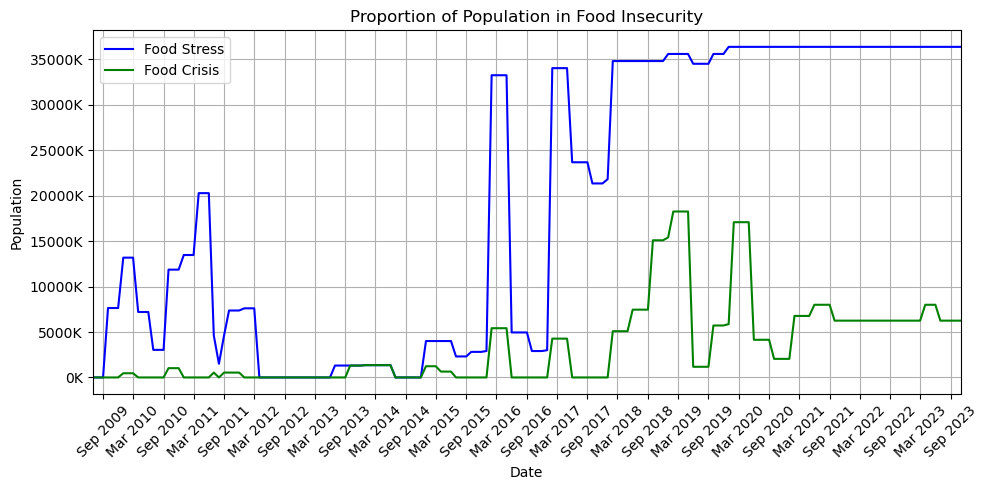

In [43]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x / 1000:.0f}K'

# Plot for Proportion IPC >= 2 and IPC >= 3
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(aggregated_df['date'], aggregated_df['Proportion_IPC_>=2'], label='Food Stress', color='blue')
ax1.plot(aggregated_df['date'], aggregated_df['Proportion_IPC_>=3'], label='Food Crisis', color='green')
ax1.set_title('Proportion of Population in Food Insecurity')
ax1.set_xlabel('Date')
ax1.set_ylabel('Population')
ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.set_xlim([aggregated_df['date'].min(), aggregated_df['date'].max()])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('food_insecurity_plot.png', format='png')

# Show the plot
plt.show()


# Calculation for Figure 4 and 5

In [45]:
print(aggregated_df.head())

        date  Proportion_IPC_>=2  Proportion_IPC_>=3
0 2009-07-01                 0.0                 0.0
1 2009-08-01                 0.0                 0.0
2 2009-09-01                 0.0                 0.0
3 2009-10-01           7639224.0                 0.0
4 2009-11-01           7639224.0                 0.0


In [47]:
aggregated_df2 = aggregated_df.copy()

# Rename the columns
aggregated_df2.rename(columns={'Proportion_IPC_>=2': 'Country_IPC_POP_Stress', 'Proportion_IPC_>=3': 'Country_IPC_POP_Crisis', 'date': 'Date'}, inplace=True)

print(aggregated_df2.head())

        Date  Country_IPC_POP_Stress  Country_IPC_POP_Crisis
0 2009-07-01                     0.0                     0.0
1 2009-08-01                     0.0                     0.0
2 2009-09-01                     0.0                     0.0
3 2009-10-01               7639224.0                     0.0
4 2009-11-01               7639224.0                     0.0


In [49]:
# Assuming Obj1 is your original DataFrame
# Step 1: Make a copy of Obj1 containing the specified columns
fews_preda = Obj1[['date', 'pop', 'IPC', 'logit1a', 'logit1b']].copy()

# Rename the columns
fews_preda.rename(columns={'logit1a': 'Food Stress', 'logit1b': 'Food Crisis', 'date': 'Date'}, inplace=True)

# Ensure the Date column is in datetime format
fews_preda['Date'] = pd.to_datetime(fews_preda['Date'])

fews_preda['Modeled_Country_IPC_Pred_Stress'] = fews_preda['IPC'] * fews_preda['Food Stress']
fews_preda['Modeled_Country_IPC_Pred_Crisis'] = fews_preda['IPC'] * fews_preda['Food Crisis']

fews_preda['Modeled_Country_IPC_Pred_Stress_a'] = fews_preda['pop'] * fews_preda['Modeled_Country_IPC_Pred_Stress']
fews_preda['Modeled_Country_IPC_Pred_Crisis_a'] = fews_preda['pop'] * fews_preda['Modeled_Country_IPC_Pred_Crisis']

# Aggregate based on Date using mean
fews_pred1 = fews_preda.groupby('Date').agg({
    'Food Stress': 'mean',
    'Food Crisis': 'mean',
    'Modeled_Country_IPC_Pred_Stress': 'mean',
    'Modeled_Country_IPC_Pred_Crisis': 'mean',
    'Modeled_Country_IPC_Pred_Stress_a': 'mean',
    'Modeled_Country_IPC_Pred_Crisis_a': 'mean'
}).reset_index()

print(fews_pred1)

          Date  Food Stress  Food Crisis  Modeled_Country_IPC_Pred_Stress  \
0   2009-07-01     0.386662     0.068300                         0.386662   
1   2009-08-01     0.349817     0.053730                         0.349817   
2   2009-09-01     0.347549     0.039434                         0.347549   
3   2009-10-01     0.335360     0.033748                         0.541202   
4   2009-11-01     0.309303     0.033021                         0.499059   
..         ...          ...          ...                              ...   
168 2023-07-01     0.546879     0.129590                         1.296486   
169 2023-08-01     0.556871     0.153905                         1.344751   
170 2023-09-01     0.521050     0.129318                         1.229942   
171 2023-10-01     0.483963     0.102096                         1.134458   
172 2023-11-01     0.467455     0.092503                         1.104740   

     Modeled_Country_IPC_Pred_Crisis  Modeled_Country_IPC_Pred_Stress_a  \


C:\Users\tgbadegesin\AppData\Local\Temp\ipykernel_27732\1951876197.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fews_preda['Date'] = pd.to_datetime(fews_preda['Date'])


In [51]:
# Merge the two DataFrames based on the 'date' column
fews_pred = pd.merge(fews_pred1, aggregated_df2, on='Date', how='inner')

print(fews_pred)

          Date  Food Stress  Food Crisis  Modeled_Country_IPC_Pred_Stress  \
0   2009-07-01     0.386662     0.068300                         0.386662   
1   2009-08-01     0.349817     0.053730                         0.349817   
2   2009-09-01     0.347549     0.039434                         0.347549   
3   2009-10-01     0.335360     0.033748                         0.541202   
4   2009-11-01     0.309303     0.033021                         0.499059   
..         ...          ...          ...                              ...   
168 2023-07-01     0.546879     0.129590                         1.296486   
169 2023-08-01     0.556871     0.153905                         1.344751   
170 2023-09-01     0.521050     0.129318                         1.229942   
171 2023-10-01     0.483963     0.102096                         1.134458   
172 2023-11-01     0.467455     0.092503                         1.104740   

     Modeled_Country_IPC_Pred_Crisis  Modeled_Country_IPC_Pred_Stress_a  \


In [ ]:
# with constant

In [53]:
# Perform Linear Regression (with constant) for Food Stress
y_stress = fews_pred['Country_IPC_POP_Stress'].values.reshape(-1, 1)
X_stress = sm.add_constant(fews_pred['Modeled_Country_IPC_Pred_Stress'].values.reshape(-1, 1))  # Add constant
X_stress_a = sm.add_constant(fews_pred['Modeled_Country_IPC_Pred_Stress_a'].values.reshape(-1, 1))  # Add constant

# Model 1: Food Stress (X_stress with constant)
model_stress = sm.OLS(y_stress, X_stress).fit()
beta_stress = model_stress.params
Final_IPC_Pred_estimate_t_Stress = model_stress.predict(X_stress)

# Model 2: Food Stress (X_stress_a with constant)
model_stress_a = sm.OLS(y_stress, X_stress_a).fit()
beta_stress_a = model_stress_a.params
Final_IPC_Pred_estimate_t_Stress_a = model_stress_a.predict(X_stress_a)

# Perform Linear Regression (with constant) for Food Crisis
y_crisis = fews_pred['Country_IPC_POP_Crisis'].values.reshape(-1, 1)
X_crisis = sm.add_constant(fews_pred['Modeled_Country_IPC_Pred_Crisis'].values.reshape(-1, 1))  # Add constant
X_crisis_a = sm.add_constant(fews_pred['Modeled_Country_IPC_Pred_Crisis_a'].values.reshape(-1, 1))  # Add constant

# Model 1: Food Crisis (X_crisis with constant)
model_crisis = sm.OLS(y_crisis, X_crisis).fit()
beta_crisis = model_crisis.params
Final_IPC_POP_estimate_Crisis = model_crisis.predict(X_crisis)

# Model 2: Food Crisis (X_crisis_a with constant)
model_crisis_a = sm.OLS(y_crisis, X_crisis_a).fit()
beta_crisis_a = model_crisis_a.params
Final_IPC_POP_estimate_Crisis_a = model_crisis_a.predict(X_crisis_a)

# Combine the results into DataFrames for plotting
results_stress_df = pd.DataFrame({
    'Date': fews_pred['Date'],
    'Food Stress': fews_pred['Food Stress'],
    'Country_IPC_POP_Stress': fews_pred['Country_IPC_POP_Stress'],
    'Modeled_Country_IPC_Pred_Stress': fews_pred['Modeled_Country_IPC_Pred_Stress'],
    'Final_IPC_Pred_estimate_Stress': Final_IPC_Pred_estimate_t_Stress.flatten(),
    'Final_IPC_Pred_estimate_Stress_a': Final_IPC_Pred_estimate_t_Stress_a.flatten()
})

results_crisis_df = pd.DataFrame({
    'Date': fews_pred['Date'],
    'Food Crisis': fews_pred['Food Crisis'],
    'Country_IPC_POP_Crisis': fews_pred['Country_IPC_POP_Crisis'],
    'Modeled_Country_IPC_Pred_Crisis': fews_pred['Modeled_Country_IPC_Pred_Crisis'],
    'Final_IPC_Pred_estimate_Crisis': Final_IPC_POP_estimate_Crisis.flatten(),
    'Final_IPC_Pred_estimate_Crisis_a': Final_IPC_POP_estimate_Crisis_a.flatten()
})


In [55]:
print(results_stress_df)

          Date  Food Stress  Country_IPC_POP_Stress  \
0   2009-07-01     0.386662            0.000000e+00   
1   2009-08-01     0.349817            0.000000e+00   
2   2009-09-01     0.347549            0.000000e+00   
3   2009-10-01     0.335360            7.639224e+06   
4   2009-11-01     0.309303            7.639224e+06   
..         ...          ...                     ...   
168 2023-07-01     0.546879            3.637416e+07   
169 2023-08-01     0.556871            3.637416e+07   
170 2023-09-01     0.521050            3.637416e+07   
171 2023-10-01     0.483963            3.637416e+07   
172 2023-11-01     0.467455            3.637416e+07   

     Modeled_Country_IPC_Pred_Stress  Final_IPC_Pred_estimate_Stress  \
0                           0.386662                   -8.696916e+04   
1                           0.349817                   -1.072235e+06   
2                           0.347549                   -1.132867e+06   
3                           0.541202               

In [57]:
print(results_crisis_df)

          Date  Food Crisis  Country_IPC_POP_Crisis  \
0   2009-07-01     0.068300            0.000000e+00   
1   2009-08-01     0.053730            0.000000e+00   
2   2009-09-01     0.039434            0.000000e+00   
3   2009-10-01     0.033748            0.000000e+00   
4   2009-11-01     0.033021            0.000000e+00   
..         ...          ...                     ...   
168 2023-07-01     0.129590            6.249565e+06   
169 2023-08-01     0.153905            6.249565e+06   
170 2023-09-01     0.129318            6.249565e+06   
171 2023-10-01     0.102096            6.249565e+06   
172 2023-11-01     0.092503            6.249565e+06   

     Modeled_Country_IPC_Pred_Crisis  Final_IPC_Pred_estimate_Crisis  \
0                           0.068300                   -9.233116e+05   
1                           0.053730                   -1.171824e+06   
2                           0.039434                   -1.415683e+06   
3                           0.062142               

# Figure 6a

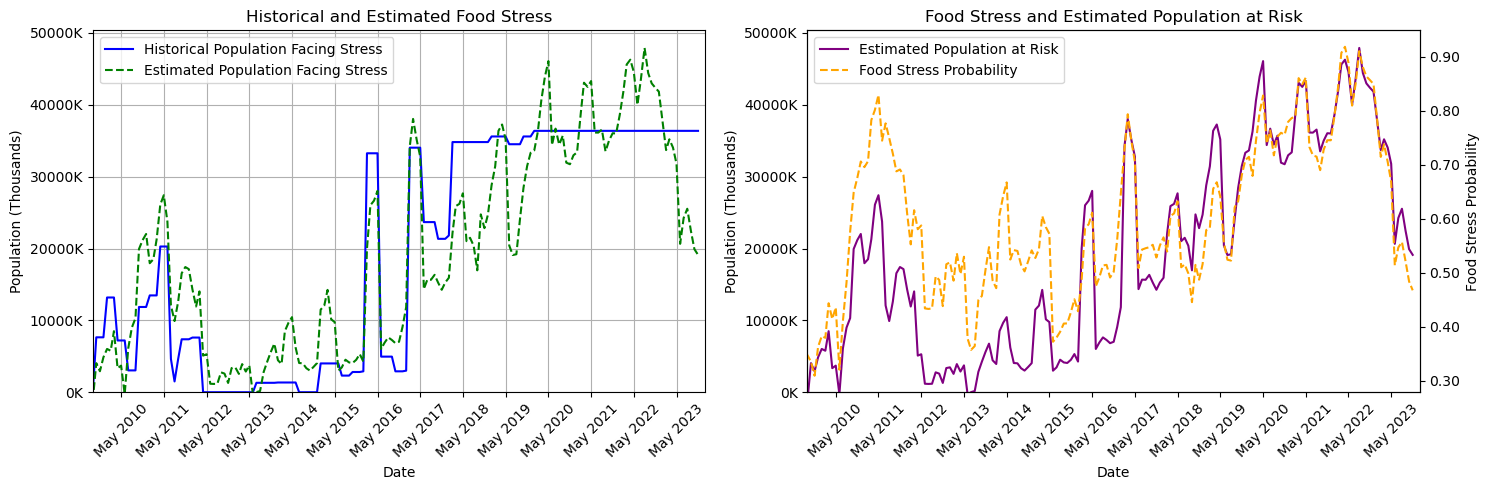

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x / 1000:.0f}K'

# Convert 'Date' column to a NumPy array
dates = results_stress_df['Date'].values

# Create a figure and two subplots placed side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot 'Final_Country_IPC_POP_Stress' and 'Final_IPC_Pred_estimate_Stress' for food stress
axs[0].plot(results_stress_df['Date'], results_stress_df['Country_IPC_POP_Stress'], label='Historical Population Facing Stress', color='blue')
axs[0].plot(results_stress_df['Date'], results_stress_df['Final_IPC_Pred_estimate_Stress'], label='Estimated Population Facing Stress', color='green', linestyle='--')
axs[0].set_title('Historical and Estimated Food Stress')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Population (Thousands)')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# Apply the thousands formatter to the y-axis on the first plot
axs[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Ensure y-axis starts from 0
axs[0].set_ylim(bottom=0)

# Plot 'Final_IPC_Pred_estimate_Stress' with secondary y-axis for 'Food Stress'
ax1 = axs[1]
ax1.plot(dates, results_stress_df['Final_IPC_Pred_estimate_Stress'], color='purple', linewidth=1.5, label='Estimated Population at Risk')
ax1.set_title('Food Stress and Estimated Population at Risk')
ax1.set_xlabel('Date')
ax1.set_ylabel('Population (Thousands)')

# Apply the thousands formatter to the y-axis on the second plot (ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Ensure y-axis starts from 0
ax1.set_ylim(bottom=0)

# Create a secondary y-axis for 'Food Stress Probability'
ax2 = ax1.twinx()
ax2.plot(dates, results_stress_df['Food Stress'], color='orange', linewidth=1.5, linestyle='--', label='Food Stress Probability')
ax2.set_ylabel('Food Stress Probability')

# Remove K formatting on the secondary y-axis since it represents proportion
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.2f}'))  # No K formatting

# Combine legends for ax1 and ax2 on the same side
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Format the x-axis ticks to show date in 6-month intervals
for ax in axs:
    ax.set_xlim([pd.Timestamp('2009-09-01'), pd.Timestamp('2023-12-31')])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('food_stress_plota.png')

# Show the plot
plt.show()


In [ ]:
# Figure 6b

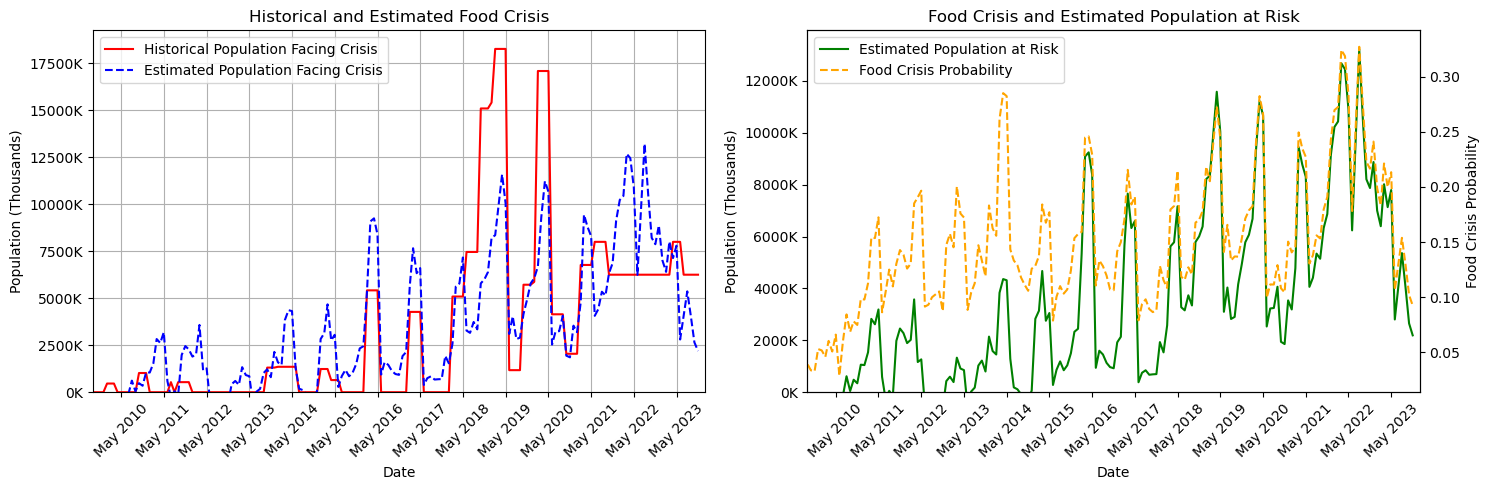

In [61]:
# Function to format y-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x / 1000:.0f}K'

# Convert 'Date' column to a NumPy array
dates = results_crisis_df['Date'].values

# Create a figure and two subplots placed side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot 'Final_Country_IPC_POP_Crisis' and 'Final_IPC_Pred_estimate_Crisis' for food crisis
axs[0].plot(results_crisis_df['Date'], results_crisis_df['Country_IPC_POP_Crisis'], label='Historical Population Facing Crisis', color='red')
axs[0].plot(results_crisis_df['Date'], results_crisis_df['Final_IPC_Pred_estimate_Crisis'], label='Estimated Population Facing Crisis', color='blue', linestyle='--')
axs[0].set_title('Historical and Estimated Food Crisis')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Population (Thousands)')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# Apply the thousands formatter to the y-axis on the first plot
axs[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Ensure y-axis starts from 0
axs[0].set_ylim(bottom=0)

# Plot 'Final_IPC_Pred_estimate_Crisis' with secondary y-axis for 'Food Crisis'
ax3 = axs[1]
ax3.plot(dates, results_crisis_df['Final_IPC_Pred_estimate_Crisis'], color='green', linewidth=1.5, label='Estimated Population at Risk')
ax3.set_title('Food Crisis and Estimated Population at Risk')
ax3.set_xlabel('Date')
ax3.set_ylabel('Population (Thousands)')

# Apply the thousands formatter to the y-axis on the second plot (ax3)
ax3.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Ensure y-axis starts from 0
ax3.set_ylim(bottom=0)

# Create a secondary y-axis for 'Food Crisis Probability'
ax4 = ax3.twinx()
ax4.plot(dates, results_crisis_df['Food Crisis'], color='orange', linewidth=1.5, linestyle='--', label='Food Crisis Probability')
ax4.set_ylabel('Food Crisis Probability')

# Remove K formatting on the secondary y-axis since it represents proportion
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.2f}'))  # No K formatting

# Combine legends for ax3 and ax4 on the same side
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3 + labels4, loc='upper left')

# Format the x-axis ticks to show date in 6-month intervals
for ax in axs:
    ax.set_xlim([pd.Timestamp('2009-09-01'), pd.Timestamp('2023-12-31')])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('food_crisis_plota.png')

# Show the plot
plt.show()


In [ ]:
# Preparing data for Figure 2

In [63]:
foodprice = pd.read_excel('AFG Data.xlsx', sheet_name = 'FoodP')
wages = pd.read_excel('AFG Data.xlsx', sheet_name = 'exchangeR')

foodprice_c = foodprice.copy()
wages_c = wages.copy()

In [64]:
# Define the categories and corresponding columns
categories = {
    'bread': ['o_bread', 'h_bread', 'l_bread', 'c_bread'],
    'rice': ['o_rice', 'h_rice', 'l_rice', 'c_rice'],
    'wheat': ['o_wheat', 'h_wheat', 'l_wheat', 'c_wheat']
}

# Calculate average for each category and create new columns
for category, columns in categories.items():
    foodprice_c[f'avg_{category}'] = foodprice_c[columns].mean(axis=1)

# Define the average columns based on the new categories
average_columns = ['avg_bread', 'avg_rice', 'avg_wheat']

# Calculate the overall average and assign to a new column 'avg_food'
foodprice_c['avg_food'] = foodprice_c[average_columns].mean(axis=1)

# List of columns to keep in the new DataFrame
columns_to_keep = ['adm1_name', 'adm2_name', 'mkt_name', 'price_date', 'year', 'month', 'avg_bread', 'avg_rice', 'avg_wheat', 'avg_food']

# Create a new DataFrame containing only the specified columns
foodprice_c2 = foodprice_c[columns_to_keep].copy()

# Filter rows based on the 'mkt_name' column for foodprice_c2
foodprice_c2 = foodprice_c2[foodprice_c2['mkt_name'].str.contains('Market Average')]

# Display the new DataFrame
print(foodprice_c2)


           adm1_name       adm2_name        mkt_name price_date  year  month  \
8520  Market Average  Market Average  Market Average 2007-01-01  2007      1   
8521  Market Average  Market Average  Market Average 2007-02-01  2007      2   
8522  Market Average  Market Average  Market Average 2007-03-01  2007      3   
8523  Market Average  Market Average  Market Average 2007-04-01  2007      4   
8524  Market Average  Market Average  Market Average 2007-05-01  2007      5   
...              ...             ...             ...        ...   ...    ...   
8728  Market Average  Market Average  Market Average 2024-05-01  2024      5   
8729  Market Average  Market Average  Market Average 2024-06-01  2024      6   
8730  Market Average  Market Average  Market Average 2024-07-01  2024      7   
8731  Market Average  Market Average  Market Average 2024-08-01  2024      8   
8732  Market Average  Market Average  Market Average 2024-09-01  2024      9   

      avg_bread  avg_rice  avg_wheat   

In [65]:
# List of non-qualified labour wage columns to calculate the average
wage_non_qualified_columns = ['o_wage_non_qualified_labour_non_agricultural', 
                              'h_wage_non_qualified_labour_non_agricultural',
                              'l_wage_non_qualified_labour_non_agricultural', 
                              'c_wage_non_qualified_labour_non_agricultural']

# Calculate the average for non-qualified labour wage and assign to a new column 'avgWageNonQL'
wages_c['avgWageNonQL'] = wages_c[wage_non_qualified_columns].mean(axis=1)

# List of qualified labour wage columns to calculate the average
wage_qualified_columns = ['o_wage_qualified_labour', 'h_wage_qualified_labour',
                          'l_wage_qualified_labour', 'c_wage_qualified_labour']

# Calculate the average for qualified labour wage and assign to a new column 'avgWageQL'
wages_c['avgWageQL'] = wages_c[wage_qualified_columns].mean(axis=1)

# Create a new column 'aveWageQLNL' consisting of the average of 'avgWageNonQL' and 'avgWageQL'
wages_c['aveWageQLNL'] = wages_c[['avgWageNonQL', 'avgWageQL']].mean(axis=1)

# Filter rows based on the 'mkt_name' column to keep only rows containing 'Market Average'
wages_c = wages_c[wages_c['mkt_name'].str.contains('Market Average')]

# Print the first few rows of the dataframe to check the results
print(wages_c.head())

# List of columns to keep in the new DataFrame
columns_to_keep = ['mkt_name', 'price_date', 'avgWageQL', 'aveWageQLNL']

# Create a new DataFrame containing only the specified columns
wages_c2 = wages_c[columns_to_keep].copy()

# Display the new DataFrame
print(wages_c2)


     ISO3      country       adm1_name       adm2_name        mkt_name  lat  \
8520  AFG  Afghanistan  Market Average  Market Average  Market Average  NaN   
8521  AFG  Afghanistan  Market Average  Market Average  Market Average  NaN   
8522  AFG  Afghanistan  Market Average  Market Average  Market Average  NaN   
8523  AFG  Afghanistan  Market Average  Market Average  Market Average  NaN   
8524  AFG  Afghanistan  Market Average  Market Average  Market Average  NaN   

      lon                    geo_id price_date  year  ...  \
8520  NaN  gid_afg_national_average 2007-01-01  2007  ...   
8521  NaN  gid_afg_national_average 2007-02-01  2007  ...   
8522  NaN  gid_afg_national_average 2007-03-01  2007  ...   
8523  NaN  gid_afg_national_average 2007-04-01  2007  ...   
8524  NaN  gid_afg_national_average 2007-05-01  2007  ...   

      trust_wage_non_qualified_labour_non_agricultural  \
8520                                               8.5   
8521                                      

In [66]:
# Merge the data
price_wages = pd.merge(foodprice_c2, wages_c2, on=['mkt_name', 'price_date'], how='inner')

print(price_wages)

          adm1_name       adm2_name        mkt_name price_date  year  month  \
0    Market Average  Market Average  Market Average 2007-01-01  2007      1   
1    Market Average  Market Average  Market Average 2007-02-01  2007      2   
2    Market Average  Market Average  Market Average 2007-03-01  2007      3   
3    Market Average  Market Average  Market Average 2007-04-01  2007      4   
4    Market Average  Market Average  Market Average 2007-05-01  2007      5   
..              ...             ...             ...        ...   ...    ...   
208  Market Average  Market Average  Market Average 2024-05-01  2024      5   
209  Market Average  Market Average  Market Average 2024-06-01  2024      6   
210  Market Average  Market Average  Market Average 2024-07-01  2024      7   
211  Market Average  Market Average  Market Average 2024-08-01  2024      8   
212  Market Average  Market Average  Market Average 2024-09-01  2024      9   

     avg_bread  avg_rice  avg_wheat   avg_food  avg

In [67]:
# Ensure 'price_date' column is in datetime format
price_wages['price_date'] = pd.to_datetime(price_wages['price_date'])

# Define the date range
start_date = pd.Timestamp('2009-07-01')
end_date = pd.Timestamp('2023-12-31')

# Filter rows where 'price_date' is between the defined range
price_wages_f = price_wages[(price_wages['price_date'] >= start_date) & (price_wages['price_date'] <= end_date)]

# Display the filtered DataFrame
print(price_wages_f)


          adm1_name       adm2_name        mkt_name price_date  year  month  \
30   Market Average  Market Average  Market Average 2009-07-01  2009      7   
31   Market Average  Market Average  Market Average 2009-08-01  2009      8   
32   Market Average  Market Average  Market Average 2009-09-01  2009      9   
33   Market Average  Market Average  Market Average 2009-10-01  2009     10   
34   Market Average  Market Average  Market Average 2009-11-01  2009     11   
..              ...             ...             ...        ...   ...    ...   
199  Market Average  Market Average  Market Average 2023-08-01  2023      8   
200  Market Average  Market Average  Market Average 2023-09-01  2023      9   
201  Market Average  Market Average  Market Average 2023-10-01  2023     10   
202  Market Average  Market Average  Market Average 2023-11-01  2023     11   
203  Market Average  Market Average  Market Average 2023-12-01  2023     12   

     avg_bread  avg_rice  avg_wheat   avg_food  avg

In [68]:
price_wages_f2 = price_wages_f.copy()

# renaming columns
price_wages_f2.rename(columns={
    'price_date': 'Date', 
    'avg_food': 'Food Price', 
    'avgWageQL': 'Agricultural Wages'
}, inplace=True)

# Ensure the Date column is in datetime format
price_wages_f2['Date'] = pd.to_datetime(price_wages_f2['Date'])

print(price_wages_f2.head())

         adm1_name       adm2_name        mkt_name       Date  year  month  \
30  Market Average  Market Average  Market Average 2009-07-01  2009      7   
31  Market Average  Market Average  Market Average 2009-08-01  2009      8   
32  Market Average  Market Average  Market Average 2009-09-01  2009      9   
33  Market Average  Market Average  Market Average 2009-10-01  2009     10   
34  Market Average  Market Average  Market Average 2009-11-01  2009     11   

    avg_bread  avg_rice  avg_wheat  Food Price  Agricultural Wages  \
30    41.4025   31.3950    18.3750   30.390833            693.3475   
31    40.4150   32.4175    18.0825   30.305000            696.0450   
32    40.6875   33.6525    17.4975   30.612500            697.8325   
33    40.7800   34.6725    17.0100   30.820833            700.1325   
34    40.2675   33.7975    16.7450   30.270000            701.8575   

    aveWageQLNL  
30    474.05125  
31    475.79250  
32    476.99500  
33    478.31625  
34    478.35000  


# Figure 2

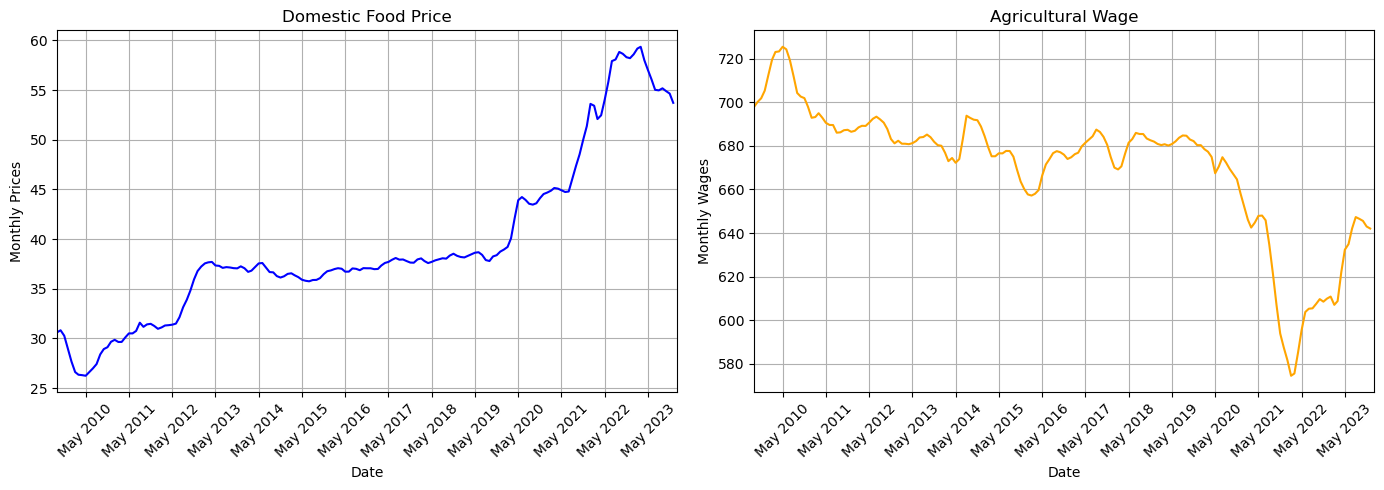

In [75]:
# Create subplots for Prices and Wages side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Domestic Food Price
axs[0].plot(price_wages_f2['Date'], price_wages_f2['Food Price'], color='blue')
axs[0].set_title('Domestic Food Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Monthly Prices')
axs[0].grid(True)

# Plot 2: Agricultural Wages
axs[1].plot(price_wages_f2['Date'], price_wages_f2['Agricultural Wages'], color='orange')
axs[1].set_title('Agricultural Wage')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Monthly Wages')
axs[1].grid(True)

# Set the x-axis limits and formatting
start_date = pd.Timestamp('2009-09-01')
end_date = pd.Timestamp('2023-12-31')

for ax in axs:
    ax.set_xlim([start_date, end_date])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('prices_wages_plot2.png')

# Show the plot
plt.show()


In [ ]:
# Preparing data for figure 3

In [77]:
# Create cor_var with specified columns and rename them
cor_var = Obj1[['date', 'rfhmean', 'IPC', 'vimmean', 'rfh_zscore_mean', 'vim_zscore_mean']].copy()
cor_var.rename(columns={
    'date': 'Date', 
    'rfhmean': 'Mean Rainfall', 
    'vimmean': 'Mean NDVI', 
    'rfh_zscore_mean': 'Rainfall Anomalies', 
    'vim_zscore_mean': 'NDVI Anomalies'
}, inplace=True)

# Ensure the Date column is in datetime format
cor_var['Date'] = pd.to_datetime(cor_var['Date'])

# Aggregate by date using mean
cor_var_agg = cor_var.groupby('Date').mean().reset_index()


C:\Users\tgbadegesin\AppData\Local\Temp\ipykernel_27732\1802313708.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cor_var['Date'] = pd.to_datetime(cor_var['Date'])


In [ ]:
# Figure 3a

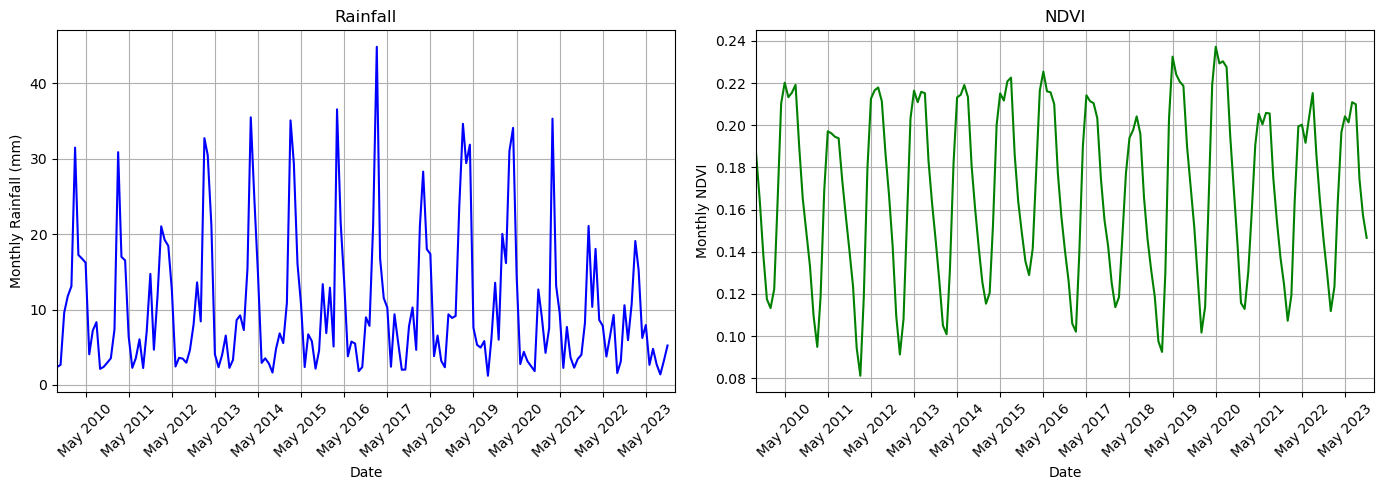

In [81]:
# Create subplots for Rainfall and NDVI side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Mean Rainfall
axs[0].plot(cor_var_agg['Date'], cor_var_agg['Mean Rainfall'], color='blue')
axs[0].set_title('Rainfall')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Monthly Rainfall (mm)')
axs[0].grid(True)

# Plot 2: Mean NDVI
axs[1].plot(cor_var_agg['Date'], cor_var_agg['Mean NDVI'], color='green')
axs[1].set_title('NDVI')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Monthly NDVI')
axs[1].grid(True)

# Set the x-axis limits and formatting
start_date = pd.Timestamp('2009-09-01')
end_date = pd.Timestamp('2023-12-31')

for ax in axs:
    ax.set_xlim([start_date, end_date])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('rainfall_ndvi_plot.png')

# Show the plot
plt.show()


In [ ]:
#Figure 3b

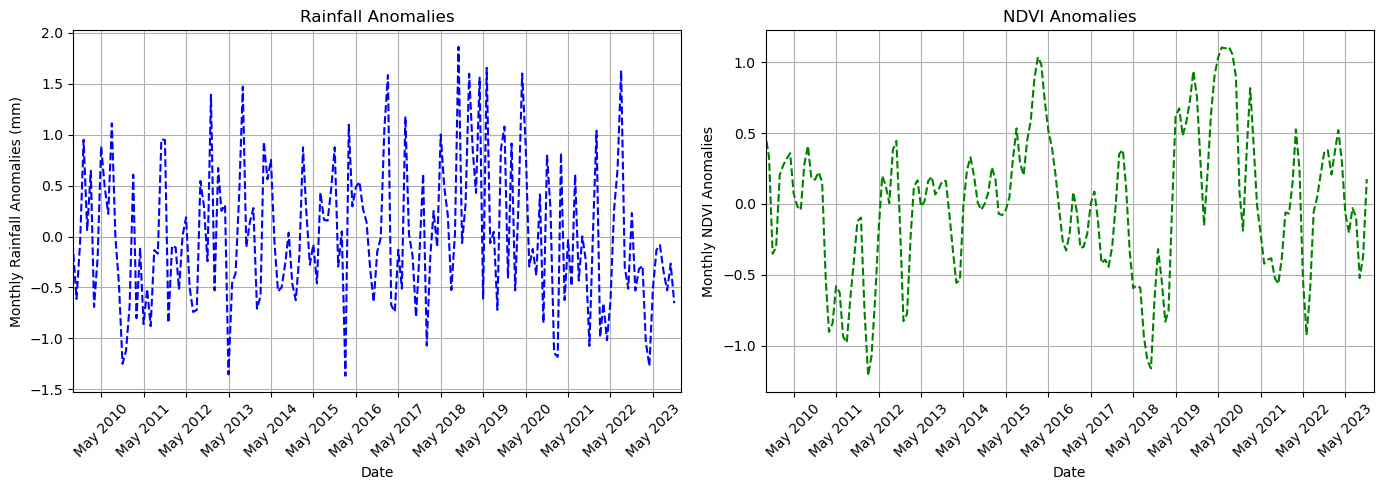

In [85]:
# Create subplots for Rainfall Anomalies and NDVI Anomalies side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Rainfall Anomalies
axs[0].plot(cor_var_agg['Date'], cor_var_agg['Rainfall Anomalies'], color='blue', linestyle='--')
axs[0].set_title('Rainfall Anomalies')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Monthly Rainfall Anomalies (mm)')
axs[0].grid(True)

# Plot 2: NDVI Anomalies
axs[1].plot(cor_var_agg['Date'], cor_var_agg['NDVI Anomalies'], color='green', linestyle='--')
axs[1].set_title('NDVI Anomalies')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Monthly NDVI Anomalies')
axs[1].grid(True)

# Set the x-axis limits and formatting
start_date = pd.Timestamp('2009-09-01')
end_date = pd.Timestamp('2023-12-31')

for ax in axs:
    ax.set_xlim([start_date, end_date])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('rainfall_ndvi_anomalies_plot.png')

# Show the plot
plt.show()


In [ ]:
Missing Libraries

In [131]:
pip install XlsxWriter

   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   -------------------------------------- - 153.6/159.9 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 159.9/159.9 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install xlrd


   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   -------------------------------------- - 92.2/96.5 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 1.1 MB/s eta 0:00:00
